In [1]:
import pandas as pd

## 1. Read Metadata

In [2]:
meta_data = pd.read_csv('../../../For_analysis/RNASequencing/IR3/metaDataIR3.csv')
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [3]:
meta_data.columns

Index(['HudAlphaID', 'QCflagIR3', 'Specimen Bar Code', 'PATNO', 'GENDER',
       'DIAGNOSIS', 'CLINICAL_EVENT', 'Specimen Bar Code.1', 'Quantity (ug)',
       'Concentration (ng/ul)', 'Concentration Flag', 'Submitted Volume (ul)',
       'Normalization Volume (30ng/ul)', 'Total Volume (ul)',
       'Input RNASeq (ng)', 'Input miRNA (ng)', '260/280 Ratio',
       '260/230 Ratio', 'RIN Value', 'BOX', 'POSITION', 'Plate', 'Sample',
       'deletion_length', 'insertion_length', 'mismatch_rate',
       'multimapped_percent', 'uniquely_mapped_percent',
       'num_annotated_splices', 'insertion_rate', 'unmapped_other_percent',
       'multimapped', 'num_splices', 'avg_input_read_length',
       'multimapped_toomany', 'total_reads', 'num_GCAG_splices',
       'unmapped_tooshort', 'unmapped_other', 'unmapped_mismatches_percent',
       'num_noncanonical_splices', 'num_ATAC_splices',
       'multimapped_toomany_percent', 'avg_mapped_read_length',
       'unmapped_mismatches', 'deletion_rate', '

In [4]:
meta_data.PATNO.value_counts()

PATNO
1010     53
1009     53
4104      5
3229      5
3214      5
         ..
42349     1
42298     1
42305     1
42431     1
42312     1
Name: count, Length: 1603, dtype: int64

In [5]:
disease_df = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [6]:
disease_df.DIAGNOSIS.value_counts()

DIAGNOSIS
Genetic Registry    435
PD                  425
Genetic Cohort      418
Control             196
Prodromal            64
SWEDD                63
PDPOOL                1
HCPOOL                1
Name: count, dtype: int64

In [7]:
import os

In [8]:
l = 0
for i in os.listdir('../../../For_analysis/RNASequencing/IR3/quant/'):
    l = l + 1
    print(i)
    if l==3:
        break

PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-1516.longRNA-NEBKAP.salmon.genes.sf


## 2. Read Gene list (Smaller)

In [9]:
gene_excel = pd.ExcelFile('/12tb_dsk3/For_analysis/PD genes.xlsx')
df2 = pd.read_excel(gene_excel, 'Standard PD genes')


In [10]:
df2

PD genes
0     LRRK2
1     PARK2
2     PARK7
3      PINK
4      SNCA
5       GBA
6      PRKN
7     PINK1
8     VPS35
9     UCHL1
10    PARK3
11   GIGYF2
12    HTRA2
13   EIF4G1
14  TMEM230
15   CHCHD2
16     RIC3
17    VPS35
18    LRP10
19     DJ-1
20  ATP13A2
21   PLA2G6
22    FBXO7
23   DNAJC6
24    SYNJ1
25   VPS13C
26    USP24
27   PARK12
28   PARK16

In [11]:
gene_list = df2['PD genes'].tolist()

In [12]:
import numpy as np
for i in range(100):
    try:
        gene_list.remove(np.nan) # run 4 times
    except:
        break

In [13]:
gene_list = [i.strip() for i in gene_list]

In [14]:
gene_list

['LRRK2',
 'PARK2',
 'PARK7',
 'PINK',
 'SNCA',
 'GBA',
 'PRKN',
 'PINK1',
 'VPS35',
 'UCHL1',
 'PARK3',
 'GIGYF2',
 'HTRA2',
 'EIF4G1',
 'TMEM230',
 'CHCHD2',
 'RIC3',
 'VPS35',
 'LRP10',
 'DJ-1',
 'ATP13A2',
 'PLA2G6',
 'FBXO7',
 'DNAJC6',
 'SYNJ1',
 'VPS13C',
 'USP24',
 'PARK12',
 'PARK16']

In [15]:
gene_list = set(gene_list)

In [16]:
len(gene_list )

28

In [17]:

from pybiomart import Server

# Connect to the Ensembl server
server = Server(host='http://www.ensembl.org')
dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']  # Replace with your organism

# Query for gene names and Ensembl IDs
# Replace 'BRCA1' with your gene of interest or a list of genes
genes_of_interest = gene_list
query_results = dataset.query(attributes=['external_gene_name', 'ensembl_gene_id'])

# Filter results for your genes of interest
results = query_results[query_results['Gene name'].isin(genes_of_interest)]
print(results)


      Gene name   Gene stable ID
3045      SYNJ1  ENSG00000159082
6572      LRP10  ENSG00000197324
23468    PLA2G6  ENSG00000184381
24967    DNAJC6  ENSG00000116675
27540     FBXO7  ENSG00000100225
27674   TMEM230  ENSG00000089063
28381    EIF4G1  ENSG00000114867
35592     PINK1  ENSG00000158828
39101      SNCA  ENSG00000145335
39185    GIGYF2  ENSG00000204120
39234     LRRK2  ENSG00000188906
41798     UCHL1  ENSG00000154277
43169   ATP13A2  ENSG00000159363
52293    CHCHD2  ENSG00000106153
53841     VPS35  ENSG00000069329
55425      PRKN  ENSG00000185345
62378     HTRA2  ENSG00000115317
62412    VPS13C  ENSG00000129003
62747      RIC3  ENSG00000166405
81439     PARK7  ENSG00000116288
82823     USP24  ENSG00000162402


In [18]:
set(gene_list) - set(results['Gene name'].tolist())

{'DJ-1', 'GBA', 'PARK12', 'PARK16', 'PARK2', 'PARK3', 'PINK'}

In [19]:
set(results['Gene name'].tolist()) - set(gene_list) 

set()

In [20]:
keep_genes = results['Gene stable ID'].tolist()

In [21]:
keep_genes.extend(['ENSG00000177628','ENSG00000158828','ENSG00000116288','ENSG00000185345'])

In [22]:
keep_genes

['ENSG00000159082',
 'ENSG00000197324',
 'ENSG00000184381',
 'ENSG00000116675',
 'ENSG00000100225',
 'ENSG00000089063',
 'ENSG00000114867',
 'ENSG00000158828',
 'ENSG00000145335',
 'ENSG00000204120',
 'ENSG00000188906',
 'ENSG00000154277',
 'ENSG00000159363',
 'ENSG00000106153',
 'ENSG00000069329',
 'ENSG00000185345',
 'ENSG00000115317',
 'ENSG00000129003',
 'ENSG00000166405',
 'ENSG00000116288',
 'ENSG00000162402',
 'ENSG00000177628',
 'ENSG00000158828',
 'ENSG00000116288',
 'ENSG00000185345']

In [23]:
len(set(keep_genes))

22

In [24]:
len(set(results['Gene name'].tolist()))

21

In [25]:
n=set(results['Gene name'].tolist())

In [26]:
results['Gene name'].value_counts()

Gene name
SYNJ1      1
LRP10      1
PLA2G6     1
DNAJC6     1
FBXO7      1
TMEM230    1
EIF4G1     1
PINK1      1
SNCA       1
GIGYF2     1
LRRK2      1
UCHL1      1
ATP13A2    1
CHCHD2     1
VPS35      1
PRKN       1
HTRA2      1
VPS13C     1
RIC3       1
PARK7      1
USP24      1
Name: count, dtype: int64

## 3. Read RNA seq (count normalized)

In [27]:
sample_3813 = pd.read_csv('../../../For_analysis/RNASequencing/IR3/quant/PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf' ,sep = '\t')
m = [i.split('.')[0] for i in sample_3813.Name.tolist()]

In [28]:
len(m)

58294

In [29]:
keep_genes = list(set(m).intersection(keep_genes))

In [30]:
keep_genes

['ENSG00000116288',
 'ENSG00000145335',
 'ENSG00000162402',
 'ENSG00000154277',
 'ENSG00000116675',
 'ENSG00000069329',
 'ENSG00000159363',
 'ENSG00000115317',
 'ENSG00000166405',
 'ENSG00000114867',
 'ENSG00000100225',
 'ENSG00000129003',
 'ENSG00000197324',
 'ENSG00000188906',
 'ENSG00000106153',
 'ENSG00000204120',
 'ENSG00000159082',
 'ENSG00000158828',
 'ENSG00000184381',
 'ENSG00000089063',
 'ENSG00000177628',
 'ENSG00000185345']

In [31]:
len(keep_genes)

22

In [32]:
l = 0
from tqdm import tqdm
data = pd.DataFrame(columns=keep_genes)
for i in tqdm(os.listdir('../../../For_analysis/RNASequencing/IR3/quant/')):
    if 'genes' not in i:
        continue
    
    read_file_path = '../../../For_analysis/RNASequencing/IR3/quant/'+ str(i)
    df = pd.read_csv(read_file_path ,sep = '\t')
    #print(df.head())
    m = [i.split('.')[0] for i in df.Name.tolist()]
    df['Name'] = m 
    df = df.rename(columns={'TPM': i})
    #print(df.head())
    df = df.set_index('Name')[[i]].T
    
    df = df[keep_genes]
    #print(df.head())
    data = pd.concat([data,df])


  0%|                                                                                                                                         | 0/9513 [00:00<?, ?it/s]/tmp/ipykernel_159184/3419326005.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,df])
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9513/9513 [02:17<00:00, 69.23it/s]


In [33]:
data.sort_index()

ENSG00000116288  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          59.6453   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          40.2482   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          50.5780   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          47.7693   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          49.8325   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          41.8486   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          38.3234   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          47.3043   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          60.8346   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          57.6864   

                                                    ENSG00000145335  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          710.733   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          504.613   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          846.073   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          765.143   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          749.998   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          314.188   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...         1046.620   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          767.495   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...         1346.350   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...         1136.020   

                                                    ENSG00000162402  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          43.9370   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          22.7027   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          31.7329   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          29.0969   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          33.9207   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          13.4071   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          25.5521   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          24.5599   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          18.3418   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          12.9795   

                                                    ENSG00000154277  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...         0.098922   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...         0.183192   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...         0.095766   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         0.102943   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...         0.035232   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...         0.053209   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...         0.092293   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         0.024467   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...         0.031876   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...         0.043516   

                                                    ENSG00000116675  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          3.47833   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          4.54705   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          5.53020   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          5.10497   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          5.21236   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          2.51273   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          6.82636   
P

In [34]:
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [35]:
l

0

In [36]:
data

ENSG00000116288  \
PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-46...          52.3362   
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197...          17.7105   
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-151...          42.8438   
PPMI-Phase1-IR3.3789.V04.PP0040-6472.5104-SL-23...          37.0564   
PPMI-Phase2-IR3.3304.V04.0003126236.5104-SL-386...          43.6378   
...                                                             ...   
PPMI-Phase2-IR3.3865.V04.PP0029-0340.5104-SL-40...          26.9407   
PPMI-Phase2-IR3.41307.V04.0003395034.5104-SL-47...          45.8439   
PPMI-Phase1-IR3.3960.BL.0003159420.5104-SL-1748...          42.1678   
PPMI-Phase2-IR3.50328.V04.0000389906.5104-SL-28...          54.9950   
PPMI-Phase1-IR3.13039.BL.PP0048-8378.5104-SL-10...          56.3909   

                                                    ENSG00000145335  \
PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-46...          815.838   
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197...          460.083   
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-151...          944.021   
PPMI-Phase1-IR3.3789.V04.PP0040-6472.5104-SL-23...          754.749   
PPMI-Phase2-IR3.3304.V04.0003126236.5104-SL-386...          795.494   
...                                                             ...   
PPMI-Phase2-IR3.3865.V04.PP0029-0340.5104-SL-40...          649.449   
PPMI-Phase2-IR3.41307.V04.0003395034.5104-SL-47...          596.259   
PPMI-Phase1-IR3.3960.BL.0003159420.5104-SL-1748...          531.261   
PPMI-Phase2-IR3.50328.V04.0000389906.5104-SL-28...         2259.410   
PPMI-Phase1-IR3.13039.BL.PP0048-8378.5104-SL-10...         1037.380   

                                                    ENSG00000162402  \
PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-46...          33.8673   
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197...          10.5386   
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-151...          18.3132   
PPMI-Phase1-IR3.3789.V04.PP0040-6472.5104-SL-23...          33.3754   
PPMI-Phase2-IR3.3304.V04.0003126236.5104-SL-386...          48.6208   
...                                                             ...   
PPMI-Phase2-IR3.3865.V04.PP0029-0340.5104-SL-40...          23.1457   
PPMI-Phase2-IR3.41307.V04.0003395034.5104-SL-47...          29.7396   
PPMI-Phase1-IR3.3960.BL.0003159420.5104-SL-1748...          28.1684   
PPMI-Phase2-IR3.50328.V04.0000389906.5104-SL-28...          33.0104   
PPMI-Phase1-IR3.13039.BL.PP0048-8378.5104-SL-10...          25.6104   

                                                    ENSG00000154277  \
PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-46...         0.000000   
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197...         0.192075   
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-151...         0.043993   
PPMI-Phase1-IR3.3789.V04.PP0040-6472.5104-SL-23...         0.000000   
PPMI-Phase2-IR3.3304.V04.0003126236.5104-SL-386...         0.291201   
...                                                             ...   
PPMI-Phase2-IR3.3865.V04.PP0029-0340.5104-SL-40...         0.000000   
PPMI-Phase2-IR3.41307.V04.0003395034.5104-SL-47...         0.000000   
PPMI-Phase1-IR3.3960.BL.0003159420.5104-SL-1748...         0.096774   
PPMI-Phase2-IR3.50328.V04.0000389906.5104-SL-28...         0.000000   
PPMI-Phase1-IR3.13039.BL.PP0048-8378.5104-SL-10...         0.102790   

                                                    ENSG00000116675  \
PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-46...          4.00408   
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197...          7.43645   
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-151...          6.73389   
PPMI-Phase1-IR3.3789.V04.PP0040-6472.5104-SL-23...          1.25218   
PPMI-Phase2-IR3.3304.V04.0003126236.5104-SL-386...          2.88504   
...                                                             ...   
PPMI-Phase2-IR3.3865.V04.PP0029-0340.5104-SL-40...          7.53084   
PPMI-Phase2-IR3.41307.V04.0003395034.5104-SL-47...          2.46987   
P

In [37]:

data.index.tolist()[0:10]

['PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-1516.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase1-IR3.3789.V04.PP0040-6472.5104-SL-2370.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase2-IR3.3304.V04.0003126236.5104-SL-3863.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase2-IR3.51010.BL.PP0048-9750.5104-SL-2670.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase2-IR3.52414.V02.0002326694.5104-SL-3045.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase2-IR3.3224.V08.0000336551.5104-SL-0419.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase1-IR3.41410.BL.PP0048-8623.5104-SL-2158.longRNA-NEBKAP.salmon.genes.sf',
 'PPMI-Phase2-IR3.4113.V04.0003181756.5104-SL-1325.longRNA-NEBKAP.salmon.genes.sf']

In [38]:
l = data.index.tolist()
patient_no = [i.split('.')[1] for i in l]
time_point = [i.split('.')[2] for i in l]

In [39]:
data['Patient_Name'] = patient_no 
data['Time_Point'] = time_point

In [40]:
col_index= ['Patient_Name',
 'Time_Point']+ data.columns.tolist()[0:-2]

In [41]:
data = data[col_index]

In [42]:
data = data.sort_values(by = 'Patient_Name', axis = 0)

In [43]:
data

Patient_Name Time_Point  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         1009       POOL   
...                                                         ...        ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        92490        V06   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...        92490        V02   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...        92834         BL   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...        92834        V02   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...        92834        V04   

                                                    ENSG00000116288  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...          45.5294   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          47.7693   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...          49.2475   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          23.3797   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...          51.1253   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          47.3043   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          41.8486   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          33.9134   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          60.8346   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          57.6864   

                                                    ENSG00000145335  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...          780.984   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          765.143   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...          907.630   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          359.657   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...          734.156   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          767.495   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          314.188   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          652.481   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...         1346.350   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...         1136.020   

                                                    ENSG00000162402  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         29.60840   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         29.09690   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         31.12680   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         12.65670   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         31.99100   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         24.55990   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...         13.40710   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          5.04216   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...         18.34180   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...         12.97950   

                                                    ENSG00000154277  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         0.203001   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         0.102943   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         0.078840   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         0.063134   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         0.000000   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        

In [44]:
data.to_csv('../../../For_analysis/PD_genes_expression.csv',index = False)

In [45]:
temp_meta = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [46]:
temp_meta.PATNO = temp_meta.PATNO.astype(str)

In [47]:
data = pd.merge(data,temp_meta, left_on = 'Patient_Name', right_on = 'PATNO')

In [48]:
keep_columns = ['DIAGNOSIS'] + data.columns.tolist()[0:-2]

In [49]:
data = data[keep_columns]

In [50]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000116288  ENSG00000145335  \
0        PDPOOL         1009       POOL          45.5294          780.984   
1        PDPOOL         1009       POOL          47.7693          765.143   
2        PDPOOL         1009       POOL          49.2475          907.630   
3        PDPOOL         1009       POOL          23.3797          359.657   
4        PDPOOL         1009       POOL          51.1253          734.156   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06          47.3043          767.495   
4740  Prodromal        92490        V02          41.8486          314.188   
4741  Prodromal        92834         BL          33.9134          652.481   
4742  Prodromal        92834        V02          60.8346         1346.350   
4743  Prodromal        92834        V04          57.6864         1136.020   

      ENSG00000162402  ENSG00000154277  ENSG00000116675  ENSG00000069329  \
0            29.60840         0.203001          5.32840         24.04930   
1            29.09690         0.102943          5.10497         23.47640   
2            31.12680         0.078840          5.47921         29.57410   
3            12.65670         0.063134          2.27054         15.41280   
4            31.99100         0.000000          4.97266         28.01090   
...               ...              ...              ...              ...   
4739         24.55990         0.024467          7.44685         26.22230   
4740         13.40710         0.053209          2.51273         19.96390   
4741          5.04216         0.015775          2.69024          8.04878   
4742         18.34180         0.031876          7.26520         23.28190   
4743         12.97950         0.043516          5.45412         18.36550   

      ENSG00000159363  ...  ENSG00000197324  ENSG00000188906  ENSG00000106153  \
0            1.975070  ...          6.77699         205.1680          63.9422   
1            1.947130  ...          6.91305         206.5250          66.7283   
2            1.728080  ...          6.96343         205.9790          60.1890   
3            0.793979  ...          3.16213          98.0488          25.3442   
4            1.900820  ...          6.81192         215.2340          73.3327   
...               ...  ...              ...              ...              ...   
4739         2.102890  ...          9.55612         227.0120          58.6068   
4740         1.062000  ...          4.88671         187.2760          59.9898   
4741         0.307232  ...          2.63858          40.6830          37.7267   
4742         0.482567  ...          5.56561         225.9260          77.2424   
4743         0.490040  ...          3.44428         151.8250          69.8908   

      ENSG00000204120  ENSG00000159082  ENSG00000158828  ENSG00000184381  \
0             61.5084         19.54570         18.37870         10.14860   
1             55.7483         17.42630         19.88130         10.23880   
2             62.9168         18.05010         22.10850         13.77320   
3             30.5277          8.21350          8.16036          4.57396   
4             65.8042         18.53090         22.60300          9.68097   
...               ...              ...              ...              ...   
4739          56.9649         16.53190         27.57930         10.95960   
4740          37.3828         13.36040         14.85430          7.39755   
4741          10.5399          5.65971         19.48300          3.65123   
4742          42.9804         19.46740         40.64910          6.48493   
4743          32.0332         12.28450         31.37610          4.47658   

      ENSG00000089063  ENSG00000177628  ENSG00000185345  
0            20.23210          4.71873         4.591900  
1            22.59660          2.95493         4.112340  
2            24.18070          4.04566         3.972930  
3             8.27238          1.73871         1.4

In [51]:
data = data[data.DIAGNOSIS.isin(['PD','Control','Prodromal'])]

In [52]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000116288  ENSG00000145335  \
106   Prodromal        10874        V06          43.8943          937.116   
107   Prodromal        10874         BL          70.3614         1262.060   
108   Prodromal        10874        V04          48.9326         1078.830   
109   Prodromal        10874        V02          46.1757          611.327   
110   Prodromal        12224        V08          63.2516         1527.620   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06          47.3043          767.495   
4740  Prodromal        92490        V02          41.8486          314.188   
4741  Prodromal        92834         BL          33.9134          652.481   
4742  Prodromal        92834        V02          60.8346         1346.350   
4743  Prodromal        92834        V04          57.6864         1136.020   

      ENSG00000162402  ENSG00000154277  ENSG00000116675  ENSG00000069329  \
106          34.03580         0.059054          2.91785         27.22900   
107          28.44880         0.209948          4.24245         37.09350   
108          37.80080         0.000000          3.34211         28.58450   
109          38.98110         0.647189          2.42422         29.87830   
110          39.90350         0.573776          4.61498         28.72650   
...               ...              ...              ...              ...   
4739         24.55990         0.024467          7.44685         26.22230   
4740         13.40710         0.053209          2.51273         19.96390   
4741          5.04216         0.015775          2.69024          8.04878   
4742         18.34180         0.031876          7.26520         23.28190   
4743         12.97950         0.043516          5.45412         18.36550   

      ENSG00000159363  ...  ENSG00000197324  ENSG00000188906  ENSG00000106153  \
106          1.766840  ...          5.01686          236.178          55.1475   
107          1.971750  ...          4.37076          258.593          89.9600   
108          2.318080  ...          7.39407          260.629          56.0238   
109          2.585340  ...          5.63061          200.669          51.4918   
110          2.511320  ...          4.36118          177.810          76.3473   
...               ...  ...              ...              ...              ...   
4739         2.102890  ...          9.55612          227.012          58.6068   
4740         1.062000  ...          4.88671          187.276          59.9898   
4741         0.307232  ...          2.63858           40.683          37.7267   
4742         0.482567  ...          5.56561          225.926          77.2424   
4743         0.490040  ...          3.44428          151.825          69.8908   

      ENSG00000204120  ENSG00000159082  ENSG00000158828  ENSG00000184381  \
106           74.4291         18.35200          19.3833         11.81420   
107           51.0785         18.43220          31.5031          8.29880   
108           80.8362         19.13960          21.6697         16.43900   
109           77.4627         20.11600          16.7646         14.53540   
110           79.0569         21.74030          24.7971         13.78580   
...               ...              ...              ...              ...   
4739          56.9649         16.53190          27.5793         10.95960   
4740          37.3828         13.36040          14.8543          7.39755   
4741          10.5399          5.65971          19.4830          3.65123   
4742          42.9804         19.46740          40.6491          6.48493   
4743          32.0332         12.28450          31.3761          4.47658   

      ENSG00000089063  ENSG00000177628  ENSG00000185345  
106           24.9986          4.26319         5.449030  
107           30.4444          3.24708         3.544770  
108           28.2738          5.71688         7.300970  
109           24.4780          6.32171         8.2

In [53]:
data.columns

Index(['DIAGNOSIS', 'Patient_Name', 'Time_Point', 'ENSG00000116288',
       'ENSG00000145335', 'ENSG00000162402', 'ENSG00000154277',
       'ENSG00000116675', 'ENSG00000069329', 'ENSG00000159363',
       'ENSG00000115317', 'ENSG00000166405', 'ENSG00000114867',
       'ENSG00000100225', 'ENSG00000129003', 'ENSG00000197324',
       'ENSG00000188906', 'ENSG00000106153', 'ENSG00000204120',
       'ENSG00000159082', 'ENSG00000158828', 'ENSG00000184381',
       'ENSG00000089063', 'ENSG00000177628', 'ENSG00000185345'],
      dtype='object')

In [54]:
# comparing control vs all time

In [55]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

### 4. Splitting into Control, PD and Prodromal

In [56]:
Control_sample = data[data.DIAGNOSIS == 'Control']
Control_sample.Time_Point.value_counts()

Time_Point
BL     189
V04    179
V02    177
V06    165
V08    159
Name: count, dtype: int64

In [57]:
PD_sample = data[data.DIAGNOSIS == 'PD']
PD_sample.Time_Point.value_counts()

Time_Point
BL     393
V04    354
V06    352
V08    340
V02    277
Name: count, dtype: int64

In [58]:
Prodromal_sample = data[data.DIAGNOSIS == 'Prodromal']
Prodromal_sample.Time_Point.value_counts()

Time_Point
V04    59
V02    59
V06    58
BL     58
V08    20
Name: count, dtype: int64

In [59]:
Control_sample = Control_sample.reset_index(drop=True)
Control_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000116288  ENSG00000145335  \
0     Control         3000        V02          54.4807          250.797   
1     Control         3000        V06          47.7865          223.146   
2     Control         3000        V04          51.0604          274.920   
3     Control         3000        V08          43.8038          439.824   
4     Control         3000         BL          42.3210          559.056   
..        ...          ...        ...              ...              ...   
864   Control         4118         BL          40.1799         1215.290   
865   Control         4118        V02          57.6497         1733.840   
866   Control         4139         BL          56.2631          776.694   
867   Control         4139        V04          34.0700          611.781   
868   Control         4139        V06          27.9338          309.939   

     ENSG00000162402  ENSG00000154277  ENSG00000116675  ENSG00000069329  \
0            21.0308         0.007179          1.49861          31.7521   
1            24.8822         0.000000          1.33995          32.8754   
2            37.0762         0.656351          2.69241          39.6309   
3            33.9526         0.000000          2.22487          34.9551   
4            37.0856         0.637764          3.02227          29.0200   
..               ...              ...              ...              ...   
864          33.1052         0.037859          1.79533          25.3614   
865          44.4188         0.034610          3.60892          38.6096   
866          15.2585         0.167002          3.06211          33.4216   
867          26.3882         0.225666          4.09435          23.1602   
868          11.4288         0.000000          1.74090          18.0685   

     ENSG00000159363  ...  ENSG00000197324  ENSG00000188906  ENSG00000106153  \
0           1.339600  ...          5.37510          183.346          53.1950   
1           1.460060  ...          3.93203          190.754          63.8192   
2           2.056210  ...          4.50382          233.469          62.9324   
3           1.396910  ...          5.63337          263.325          61.9456   
4           1.925190  ...          8.88769          212.186          53.3611   
..               ...  ...              ...              ...              ...   
864         1.792970  ...          5.13200          168.461          46.6947   
865         2.245800  ...          7.27364          279.241          68.6120   
866         1.671520  ...          3.69722          159.226          63.6006   
867         6.887220  ...         29.02680          139.685          54.4276   
868         0.416763  ...          3.43138          151.679          36.6246   

     ENSG00000204120  ENSG00000159082  ENSG00000158828  ENSG00000184381  \
0            48.3812          15.0479          17.8148          8.11538   
1            53.8791          20.2288          12.6546          7.53008   
2            66.1595          20.5511          17.8667          9.70310   
3            69.3606          24.9542          20.5507         12.26660   
4            75.0518          21.3355          25.5506         18.24470   
..               ...              ...              ...              ...   
864          66.4151          21.1221          10.4723         16.06110   
865          97.8571          30.2474          24.7762         18.47030   
866          36.8427          14.8146          27.5275          7.89243   
867          45.4222          16.2591          29.2055         30.02000   
868          30.7320          11.5364          13.2249          3.39205   

     ENSG00000089063  ENSG00000177628  ENSG00000185345  
0            16.0565          3.00914          2.50094  
1            24.0990          2.27277          4.49258  
2            24.7190          3.68884          5.80795  
3            23.5816          3.18451          5.78882  
4            25.3319          4.54226          6.23027 

In [60]:
Prodromal_sample = Prodromal_sample.reset_index(drop=True)
Prodromal_sample

DIAGNOSIS Patient_Name Time_Point  ENSG00000116288  ENSG00000145335  \
0    Prodromal        10874        V06          43.8943          937.116   
1    Prodromal        10874         BL          70.3614         1262.060   
2    Prodromal        10874        V04          48.9326         1078.830   
3    Prodromal        10874        V02          46.1757          611.327   
4    Prodromal        12224        V08          63.2516         1527.620   
..         ...          ...        ...              ...              ...   
249  Prodromal        92490        V06          47.3043          767.495   
250  Prodromal        92490        V02          41.8486          314.188   
251  Prodromal        92834         BL          33.9134          652.481   
252  Prodromal        92834        V02          60.8346         1346.350   
253  Prodromal        92834        V04          57.6864         1136.020   

     ENSG00000162402  ENSG00000154277  ENSG00000116675  ENSG00000069329  \
0           34.03580         0.059054          2.91785         27.22900   
1           28.44880         0.209948          4.24245         37.09350   
2           37.80080         0.000000          3.34211         28.58450   
3           38.98110         0.647189          2.42422         29.87830   
4           39.90350         0.573776          4.61498         28.72650   
..               ...              ...              ...              ...   
249         24.55990         0.024467          7.44685         26.22230   
250         13.40710         0.053209          2.51273         19.96390   
251          5.04216         0.015775          2.69024          8.04878   
252         18.34180         0.031876          7.26520         23.28190   
253         12.97950         0.043516          5.45412         18.36550   

     ENSG00000159363  ...  ENSG00000197324  ENSG00000188906  ENSG00000106153  \
0           1.766840  ...          5.01686          236.178          55.1475   
1           1.971750  ...          4.37076          258.593          89.9600   
2           2.318080  ...          7.39407          260.629          56.0238   
3           2.585340  ...          5.63061          200.669          51.4918   
4           2.511320  ...          4.36118          177.810          76.3473   
..               ...  ...              ...              ...              ...   
249         2.102890  ...          9.55612          227.012          58.6068   
250         1.062000  ...          4.88671          187.276          59.9898   
251         0.307232  ...          2.63858           40.683          37.7267   
252         0.482567  ...          5.56561          225.926          77.2424   
253         0.490040  ...          3.44428          151.825          69.8908   

     ENSG00000204120  ENSG00000159082  ENSG00000158828  ENSG00000184381  \
0            74.4291         18.35200          19.3833         11.81420   
1            51.0785         18.43220          31.5031          8.29880   
2            80.8362         19.13960          21.6697         16.43900   
3            77.4627         20.11600          16.7646         14.53540   
4            79.0569         21.74030          24.7971         13.78580   
..               ...              ...              ...              ...   
249          56.9649         16.53190          27.5793         10.95960   
250          37.3828         13.36040          14.8543          7.39755   
251          10.5399          5.65971          19.4830          3.65123   
252          42.9804         19.46740          40.6491          6.48493   
253          32.0332         12.28450          31.3761          4.47658   

     ENSG00000089063  ENSG00000177628  ENSG00000185345  
0            24.9986          4.26319         5.449030  
1            30.4444          3.24708         3.544770  
2            28.2738          5.71688         7.300970  
3            24.4780          6.32171         8.292420  
4            33.6460          3.11710       

In [61]:
PD_sample = PD_sample.reset_index(drop=True)
PD_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000116288  ENSG00000145335  \
0           PD         3001         BL          31.0981          307.437   
1           PD         3001        V02          59.3378          544.289   
2           PD         3001        V06          35.0741          363.941   
3           PD         3001        V08          26.5692          419.341   
4           PD         3001        V04          49.5041          542.364   
...        ...          ...        ...              ...              ...   
1711        PD         4135        V04          29.4949          619.088   
1712        PD         4135        V02          60.4149         1436.270   
1713        PD         4136        V06          54.4703         1131.080   
1714        PD         4136         BL          37.7126         1477.950   
1715        PD         4136        V04          55.8393         1282.050   

      ENSG00000162402  ENSG00000154277  ENSG00000116675  ENSG00000069329  \
0             13.7645         0.016154         1.950980          16.7650   
1             31.3530         0.128732         1.761370          36.9170   
2             16.6411         0.395362         1.598990          28.0105   
3             15.1709         0.072173         0.983176          18.4382   
4             26.5977         0.101421         3.343000          37.7995   
...               ...              ...              ...              ...   
1711          13.8315         0.020587        25.824400          22.4870   
1712          40.5845         0.381744        10.886200          30.7188   
1713          29.0133         0.014219         5.135940          28.7017   
1714          29.4882         0.587799         6.919620          19.0321   
1715          55.4495         0.150180         3.807730          36.2530   

      ENSG00000159363  ...  ENSG00000197324  ENSG00000188906  ENSG00000106153  \
0             1.01174  ...          3.97583          98.5283          34.3726   
1             1.61034  ...          5.63783         210.7200          73.6386   
2             1.70667  ...          4.41340         126.3560          30.8604   
3             0.78205  ...          3.70748         119.2060          22.5691   
4             1.34640  ...          5.34087         170.5060          64.3527   
...               ...  ...              ...              ...              ...   
1711          0.83818  ...          2.56624         140.6950          35.5022   
1712          2.60976  ...         10.42010         333.2730          78.9923   
1713          1.81593  ...          5.23182         195.2620          75.5410   
1714          3.95658  ...         12.92030         166.6380          46.0946   
1715          3.36659  ...          8.71596         216.9480          58.9332   

      ENSG00000204120  ENSG00000159082  ENSG00000158828  ENSG00000184381  \
0             32.2523          11.1437          9.21338          6.26748   
1             70.6082          21.8249         18.83140          9.80657   
2             45.6364          13.6891         13.32690          8.65442   
3             36.3415          10.6353         11.09930          4.96116   
4             53.4950          17.4853         22.53470          7.70604   
...               ...              ...              ...              ...   
1711          29.0091          12.7665         13.36980          4.52627   
1712          87.7467          28.6544         56.17720         24.79000   
1713          58.5483          20.5574         33.28070         14.94670   
1714          48.9142          13.6405         36.62250         27.06830   
1715          90.6790          23.5553         33.18140         23.22510   

      ENSG00000089063  ENSG00000177628  ENSG00000185345  
0            11.37440          1.72208         1.756920  
1            26.93670          3.08184         4.190620  
2            12.08110          2.28641         3.580440  
3            10.28400          2.24024         1.497930  
4  

In [62]:
elements = list(set(data.Time_Point))

In [63]:
import itertools

# Define the list

# Generate all combinations of 2 including reverse pairs
combinations_with_reverse = list(itertools.product(elements, repeat=2))

# Print the result
for combo in combinations_with_reverse:
    print(combo)


('V04', 'V04')
('V04', 'V02')
('V04', 'BL')
('V04', 'V06')
('V04', 'V08')
('V02', 'V04')
('V02', 'V02')
('V02', 'BL')
('V02', 'V06')
('V02', 'V08')
('BL', 'V04')
('BL', 'V02')
('BL', 'BL')
('BL', 'V06')
('BL', 'V08')
('V06', 'V04')
('V06', 'V02')
('V06', 'BL')
('V06', 'V06')
('V06', 'V08')
('V08', 'V04')
('V08', 'V02')
('V08', 'BL')
('V08', 'V06')
('V08', 'V08')


### 5. all combination Control vs PRODROMAL (Logistic Regression)
#####   i.) Run 1000 times to calculate avg feature importance of each genes

In [65]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
import random
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import random
from itertools import product  # assuming combinations_with_reverse is some kind of product

ACCURACY_DICT = dict()
MAX_SAMPLES = dict()
FEATURE_IMPORTANCES = dict()

F1_SCORES = dict()
PRECISION_SCORES = dict()
RECALL_SCORES = dict()
AUC_SCORES = dict()

for combo in tqdm(combinations_with_reverse):
    
    PD_sample_ = PD_sample[PD_sample.Time_Point== combo[0]].iloc[:,3:]
    PD_sample_ = PD_sample_.reset_index(drop = True)
    
    Control_sample_ = Control_sample[Control_sample.Time_Point== combo[1]].iloc[:,3:]
    Control_sample_ = Control_sample_.reset_index(drop = True)

    
    accuracies_temp = []
    auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i in range(1000):
        
        max_num = min(len(PD_sample_),len(Control_sample_))
        
        random_numbers = random.sample(range(0, max_num), max_num)
        
        PD_sample_temp = PD_sample_.iloc[random_numbers,:]
        
        Control_sample_temp = Control_sample_.iloc[random_numbers,:]
        
        X = pd.concat([PD_sample_temp,Control_sample_temp])
        
        y = [0 for i in range(len(PD_sample_temp))] + [1 for i in range(len(Control_sample_temp))]
    
    
    # Stratified train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # Initialize and fit the Logistic Regression model
        model = LogisticRegression(max_iter=150000)
        rfe = RFE(estimator=model,n_features_to_select=22)  # Select top 10 features, adjust as needed
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)


        selected_features = X.columns[rfe.support_]
        feature_ranks = rfe.ranking_
        model.fit(X_train_rfe, y_train)
        
        # Predict and evaluate the model
        y_pred = model.predict(X_test_rfe)
        y_prob = model.predict_proba(X_test_rfe)[:, 1]  # probability for the positive class
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies_temp.append(accuracy)
        auc_scores.append(auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        # Store feature names and scores for the first iteration only, to avoid redundancy
        
        coefficients = model.coef_.flatten()
        feature_coefficients = dict(zip(selected_features, coefficients))
        FEATURE_IMPORTANCES[f'PD_{combo[0]}_Control_{combo[1]}_{i}'] =feature_coefficients
    
        

    ACCURACY_DICT[f'PD_{combo[0]}_control_{combo[1]}'] = np.mean(accuracies_temp)
    MAX_SAMPLES[f'PD_{combo[0]}_control_{combo[1]}'] = max_num


    PRECISION_SCORES[f'PD_{combo[0]}_control_{combo[1]}'] =  np.mean(precision_scores)
    RECALL_SCORES[f'PD_{combo[0]}_control_{combo[1]}'] =  np.mean(recall_scores)
    AUC_SCORES[f'PD_{combo[0]}_control_{combo[1]}'] =  np.mean(auc_scores)
    
    # Storing additional metrics
    print(f"Metrics for PD_{combo[0]}_control_{combo[1]}:")
    print(f"Accuracy: {np.mean(accuracies_temp)}")
    print(f"AUC: {np.mean(auc_scores)}")
    print(f"Precision: {np.mean(precision_scores)}")
    print(f"Recall: {np.mean(recall_scores)}")
    print(f"F1 Score: {np.mean(f1_scores)}")


  4%|█████                                                                                                                           | 1/25 [03:46<1:30:39, 226.63s/it]

Metrics for Prodromal_V04_PD_V04:
Accuracy: 0.5409444444444444
AUC: 0.5771543209876543
Precision: 0.5448835532563199
Recall: 0.5123333333333334
F1 Score: 0.5255014636659566


  8%|██████████▏                                                                                                                     | 2/25 [08:53<1:44:52, 273.58s/it]

Metrics for Prodromal_V04_PD_V02:
Accuracy: 0.7841408450704225
AUC: 0.8560301587301588
Precision: 0.7849618521907266
Recall: 0.7797142857142858
F1 Score: 0.7800613586021314


 12%|███████████████▎                                                                                                                | 3/25 [12:40<1:32:30, 252.32s/it]

Metrics for Prodromal_V04_PD_BL:
Accuracy: 0.5965131578947369
AUC: 0.6239674515235457
Precision: 0.5988429873284299
Recall: 0.5915526315789473
F1 Score: 0.5930012269825763


 16%|████████████████████▍                                                                                                           | 4/25 [16:20<1:23:53, 239.69s/it]

Metrics for Prodromal_V04_PD_V06:
Accuracy: 0.545651515151515
AUC: 0.5524820936639118
Precision: 0.5442166877481484
Recall: 0.571939393939394
F1 Score: 0.555293080275911


 20%|█████████████████████████▌                                                                                                      | 5/25 [20:03<1:17:55, 233.79s/it]

Metrics for Prodromal_V04_PD_V08:
Accuracy: 0.566625
AUC: 0.5924248046875
Precision: 0.5662604782336402
Recall: 0.5759375
F1 Score: 0.5685512914393402


 24%|██████████████████████████████▋                                                                                                 | 6/25 [25:07<1:21:36, 257.69s/it]

Metrics for Prodromal_V02_PD_V04:
Accuracy: 0.7841666666666667
AUC: 0.8709081790123457
Precision: 0.7848177175468349
Recall: 0.7885277777777777
F1 Score: 0.7846550750462803


 28%|███████████████████████████████████▊                                                                                            | 7/25 [30:48<1:25:25, 284.74s/it]

Metrics for Prodromal_V02_PD_V02:
Accuracy: 0.5640845070422535
AUC: 0.6131380952380953
Precision: 0.5572273545729172
Recall: 0.5681428571428571
F1 Score: 0.5603465260856743


 32%|████████████████████████████████████████▉                                                                                       | 8/25 [35:49<1:22:07, 289.88s/it]

Metrics for Prodromal_V02_PD_BL:
Accuracy: 0.764921052631579
AUC: 0.8443587257617728
Precision: 0.7719766403339064
Recall: 0.757157894736842
F1 Score: 0.7625289524135725


 36%|██████████████████████████████████████████████                                                                                  | 9/25 [40:34<1:16:57, 288.58s/it]

Metrics for Prodromal_V02_PD_V06:
Accuracy: 0.8169090909090909
AUC: 0.8885472910927456
Precision: 0.8155028549412309
Recall: 0.8248484848484847
F1 Score: 0.8181283418160312


 40%|██████████████████████████████████████████████████▊                                                                            | 10/25 [45:27<1:12:29, 289.97s/it]

Metrics for Prodromal_V02_PD_V08:
Accuracy: 0.76796875
AUC: 0.8601708984375
Precision: 0.7771652245145487
Recall: 0.75753125
F1 Score: 0.7647851177219017


 44%|███████████████████████████████████████████████████████▉                                                                       | 11/25 [49:40<1:04:59, 278.51s/it]

Metrics for Prodromal_BL_PD_V04:
Accuracy: 0.5835833333333332
AUC: 0.6158958333333333
Precision: 0.5907428754352866
Recall: 0.5525277777777777
F1 Score: 0.5686272260148353


 48%|████████████████████████████████████████████████████████████▉                                                                  | 12/25 [55:13<1:03:56, 295.10s/it]

Metrics for Prodromal_BL_PD_V02:
Accuracy: 0.7862253521126761
AUC: 0.856297619047619
Precision: 0.7869328048005455
Recall: 0.7825428571428572
F1 Score: 0.7824904079803481


 52%|███████████████████████████████████████████████████████████████████                                                              | 13/25 [59:05<55:10, 275.86s/it]

Metrics for Prodromal_BL_PD_BL:
Accuracy: 0.5242236842105262
AUC: 0.54996675900277
Precision: 0.5256882540903401
Recall: 0.5087105263157895
F1 Score: 0.5148207690351377


 56%|███████████████████████████████████████████████████████████████████████                                                        | 14/25 [1:03:25<49:43, 271.21s/it]

Metrics for Prodromal_BL_PD_V06:
Accuracy: 0.579469696969697
AUC: 0.6083719008264463
Precision: 0.5814073464128746
Recall: 0.5767575757575758
F1 Score: 0.5766048776253465


 60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 15/25 [1:07:39<44:20, 266.04s/it]

Metrics for Prodromal_BL_PD_V08:
Accuracy: 0.58871875
AUC: 0.6202041015625
Precision: 0.5917735335639817
Recall: 0.580125
F1 Score: 0.5833908167668849


 64%|█████████████████████████████████████████████████████████████████████████████████▎                                             | 16/25 [1:11:34<38:28, 256.54s/it]

Metrics for Prodromal_V06_PD_V04:
Accuracy: 0.588486111111111
AUC: 0.6253117283950617
Precision: 0.5988398106959594
Recall: 0.5425833333333333
F1 Score: 0.566517581387243


 68%|██████████████████████████████████████████████████████████████████████████████████████▎                                        | 17/25 [1:16:24<35:34, 266.85s/it]

Metrics for Prodromal_V06_PD_V02:
Accuracy: 0.8093661971830987
AUC: 0.885718253968254
Precision: 0.8072443568982586
Recall: 0.8106285714285716
F1 Score: 0.8068146629946167


 72%|███████████████████████████████████████████████████████████████████████████████████████████▍                                   | 18/25 [1:20:35<30:34, 262.07s/it]

Metrics for Prodromal_V06_PD_BL:
Accuracy: 0.6076842105263158
AUC: 0.6422825484764543
Precision: 0.6109519327651798
Recall: 0.5995526315789474
F1 Score: 0.6028615691412047


 76%|████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 19/25 [1:23:48<24:06, 241.15s/it]

Metrics for Prodromal_V06_PD_V06:
Accuracy: 0.5292121212121212
AUC: 0.5455867768595041
Precision: 0.5298521194449225
Recall: 0.5232424242424243
F1 Score: 0.5239866841252585


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 20/25 [1:27:03<18:57, 227.44s/it]

Metrics for Prodromal_V06_PD_V08:
Accuracy: 0.56709375
AUC: 0.5796767578125
Precision: 0.5664120468871295
Recall: 0.58034375
F1 Score: 0.5709164495828073


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 21/25 [1:31:34<16:01, 240.45s/it]

Metrics for Prodromal_V08_PD_V04:
Accuracy: 0.6276666666666667
AUC: 0.6740108024691358
Precision: 0.6322247061256381
Recall: 0.61675
F1 Score: 0.6220803685265066


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 22/25 [1:37:06<13:23, 267.77s/it]

Metrics for Prodromal_V08_PD_V02:
Accuracy: 0.8312535211267607
AUC: 0.9112484126984127
Precision: 0.8312871232858963
Recall: 0.8293428571428573
F1 Score: 0.8285837779141898


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 23/25 [1:43:41<10:12, 306.19s/it]

Metrics for Prodromal_V08_PD_BL:
Accuracy: 0.6233421052631579
AUC: 0.6722084487534626
Precision: 0.6324095232367231
Recall: 0.5979210526315789
F1 Score: 0.6121035837711224


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 24/25 [1:52:00<06:03, 363.93s/it]

Metrics for Prodromal_V08_PD_V06:
Accuracy: 0.5638333333333333
AUC: 0.5953673094582187
Precision: 0.5666793116736735
Recall: 0.5535757575757576
F1 Score: 0.557372854396899


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [2:07:40<00:00, 306.44s/it]

Metrics for Prodromal_V08_PD_V08:
Accuracy: 0.55815625
AUC: 0.5862939453125
Precision: 0.5616180541858721
Recall: 0.53640625
F1 Score: 0.5460654859706757


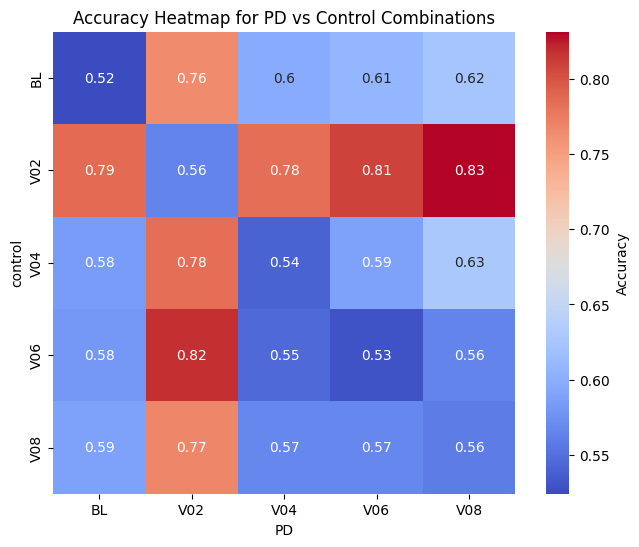

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PD = []
Control= []
acc = []
for i,j in ACCURACY_DICT.items():
    PD.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pd_control = pd.DataFrame([PD,Control,acc]).T
accuracy_table_pd_control  = accuracy_table_pd_control.rename(columns = {0:'PD', 1:'control', 2: 'Accuracy'})

accuracy_table_pd_control['Accuracy'] = accuracy_table_pd_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pd_control.pivot(index="control", columns="PD", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for PD vs Control Combinations")

plt.savefig("../heatmaps_plots/accuracy_heatmaps/PD_con_vs_pd_accuracy_heatmap.svg", format='svg')

plt.show()

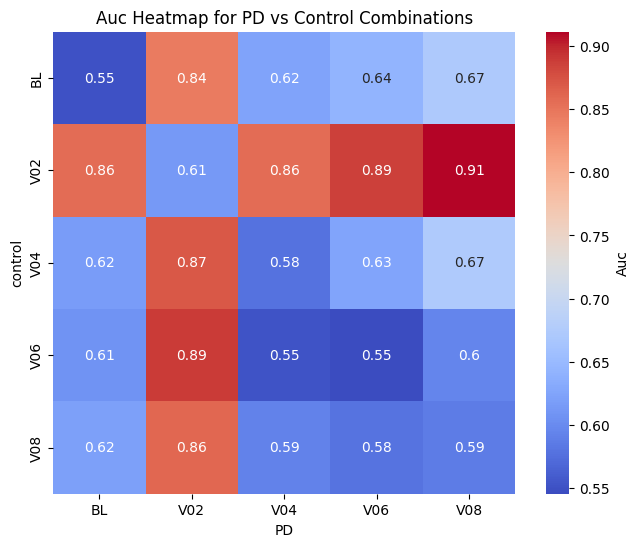

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PD = []
Control= []
auc = []
for i,j in AUC_SCORES.items():
    PD.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    auc.append(j)


auc_table_pd_control = pd.DataFrame([PD,Control,auc]).T
auc_table_pd_control  = auc_table_pd_control.rename(columns = {0:'PD', 1:'control', 2: 'Auc'})

auc_table_pd_control['Auc'] = auc_table_pd_control['Auc'].astype(float)
heatmap_data_ = auc_table_pd_control.pivot(index="control", columns="PD", values="Auc")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Auc'})
plt.title("Auc Heatmap for PD vs Control Combinations")

plt.savefig("../heatmaps_plots/auc_heatmaps/PD_con_vs_pd_auc_heatmap.svg", format='svg')

plt.show()

In [68]:
df_acc = pd.DataFrame(list(ACCURACY_DICT.items()), columns=['Comparison', 'Accuracy'])
df_auc = pd.DataFrame(list(AUC_SCORES.items()), columns=['Comparison', 'AUC'])
#df_f1  = pd.DataFrame(list(F1_SCORES.items()), columns=['Comparison', 'F1'])
df_precision = pd.DataFrame(list(PRECISION_SCORES.items()), columns=['Comparison', 'Precision'])
df_recall = pd.DataFrame(list(RECALL_SCORES.items()), columns=['Comparison', 'Recall'])

import pandas as pd
from functools import reduce

# List of DataFrames to merge
dfs = [df_acc, df_auc, df_precision, df_recall]

# Merge all DataFrames on 'Comparison'
df_all = reduce(lambda left, right: pd.merge(left, right, on='Comparison'), dfs)

df_all.to_csv('../metrics_csv_files/metrics_PD_con_vs_pd.csv',index = False)

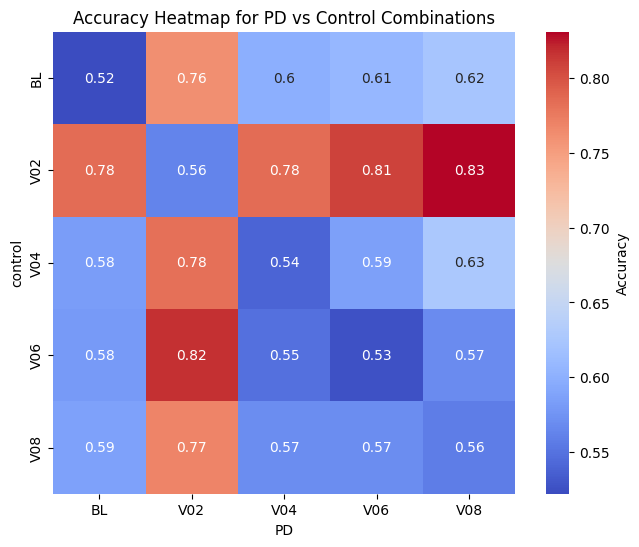

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PD = []
Control= []
acc = []
for i,j in ACCURACY_DICT.items():
    PD.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pd_control = pd.DataFrame([PD,Control,acc]).T
accuracy_table_pd_control  = accuracy_table_pd_control.rename(columns = {0:'PD', 1:'control', 2: 'Accuracy'})

accuracy_table_pd_control['Accuracy'] = accuracy_table_pd_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pd_control.pivot(index="control", columns="PD", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for PD vs Control Combinations")
plt.show()

In [67]:
#FEATURE_IMPORTANCES['Prodromal_V08_Control_V08']
#sorted_0_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08'].items(), key=lambda item: item[1]))

In [68]:
#sorted_0_dict_FEATURE_IMPORTANCES_asc

In [69]:
sorted_2_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['PD_V08_Control_V08_1'].items(), key=lambda item: item[1]))
sorted_2_dict_FEATURE_IMPORTANCES_asc

{'ENSG00000159363': -0.4646722724385059,
 'ENSG00000185345': -0.22124623862617107,
 'ENSG00000115317': -0.21687513833409056,
 'ENSG00000197324': -0.057844367580639496,
 'ENSG00000166405': -0.03870584836899914,
 'ENSG00000116288': -0.02576914532099643,
 'ENSG00000106153': -0.01388325343383236,
 'ENSG00000162402': -0.011351242139965618,
 'ENSG00000188906': -0.005085751137304681,
 'ENSG00000158828': -0.0031768441118331363,
 'ENSG00000069329': -0.0009599697950219262,
 'ENSG00000145335': -0.00013800263536769313,
 'ENSG00000100225': 0.0020487708248087626,
 'ENSG00000204120': 0.008813873052201646,
 'ENSG00000184381': 0.01148233097237292,
 'ENSG00000159082': 0.020671978434145984,
 'ENSG00000129003': 0.04714042584630669,
 'ENSG00000089063': 0.06778448126305679,
 'ENSG00000116675': 0.0715299561832636,
 'ENSG00000177628': 0.08614034755995612,
 'ENSG00000114867': 0.1550244244131336,
 'ENSG00000154277': 0.4520498215328874}

In [70]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

In [71]:
data['DIAGNOSIS_2'] = data['DIAGNOSIS']

/tmp/ipykernel_2544/3022521848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIAGNOSIS_2'] = data['DIAGNOSIS']


In [72]:
data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)

/tmp/ipykernel_2544/960865595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)
/tmp/ipykernel_2544/960865595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodro

In [73]:
data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']

/tmp/ipykernel_2544/3372653969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
/tmp/ipykernel_2544/3372653969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']


In [74]:
data = data.sort_values(by = 'New_Time_Point')

In [75]:
tmp_data = data[data.Time_Point !='V02']

In [76]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000089063  ENSG00000166405  \
2979  1.Control         4067         BL         24.12530          8.51330   
1675  1.Control         3555         BL         20.75600          9.24460   
1672  1.Control         3554         BL         17.25020          5.72661   
1663  1.Control         3551         BL         33.10260         12.98080   
1844  1.Control         3614         BL         19.61950          4.34235   
...         ...          ...        ...              ...              ...   
1047       3.PD         3352        V08          5.02486          2.28591   
3260       3.PD         4099        V08         21.59540         10.09390   
578        3.PD         3154        V08         23.89320          7.50529   
1992       3.PD         3700        V08         22.22010          7.98035   
1622       3.PD         3530        V08         17.73420          5.43142   

      ENSG00000106153  ENSG00000159082  ENSG00000116288  ENSG00000069329  \
2979          62.7528         22.35130          55.9921         33.23750   
1675          60.3481         19.03930          49.1376         29.63310   
1672          46.8894         12.63510          33.7736         23.15050   
1663         109.0100         31.35260          60.3267         36.94600   
1844          57.5668         11.81790          33.3355         19.61130   
...               ...              ...              ...              ...   
1047          19.5526          4.76701          17.1162          9.86791   
3260          96.6507         25.48790          76.4594         34.07500   
578           70.0163         17.00210          54.0591         34.93950   
1992          73.7310         13.94940          42.4771         20.13740   
1622          72.6860         17.65330          48.5823         22.12200   

      ENSG00000116675  ...  ENSG00000114867  ENSG00000162402  ENSG00000188906  \
2979          3.86776  ...         11.86950         30.60830         226.5040   
1675          3.12575  ...         10.29830         30.71000         273.0890   
1672         16.54240  ...          8.59186         17.55890          96.8387   
1663          3.23841  ...         15.71130         60.45620         318.7960   
1844         11.24900  ...          6.70965         18.98350         141.7070   
...               ...  ...              ...              ...              ...   
1047          1.26697  ...          2.98225          7.30353          56.6825   
3260          2.97168  ...         12.65800         31.45730         293.4120   
578           2.09904  ...          9.84251         28.00460         174.4590   
1992          6.29110  ...          6.88361         21.49840         136.9140   
1622          5.10131  ...          6.59332         25.34980         234.3940   

      ENSG00000100225  ENSG00000184381  ENSG00000145335  ENSG00000177628  \
2979         275.0410         12.04080          654.298         3.142930   
1675          66.8495         11.50450          146.576         2.832420   
1672          72.3468         12.32380          174.135         3.239610   
1663         176.3210         20.71020          610.807         4.209080   
1844         180.6110         10.17930          869.486         2.241680   
...               ...              ...              ...              ...   
1047          75.7332          2.78270          237.451         0.867317   
3260         162.3550         12.63190          708.329         2.843900   
578          213.2440          8.36961          567.734         2.795540   
1992         177.2970          8.92341          733.562         2.417340   
1622         236.0270          5.79382         1017.560         2.685690   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
1675      Control    1.Control_BL        Control_BL  
1672      Control    1.Control_BL        Control_BL  
1663      Control    1.Control_BL        Control_BL  
1844      Co

In [77]:
df = pd.DataFrame(sorted_2_dict_FEATURE_IMPORTANCES_asc.items())
df[2] = np.abs(df[1])
df = df.sort_values(by = 2, ascending=False)
df

0         1         2
0   ENSG00000159363 -0.464672  0.464672
21  ENSG00000154277  0.452050  0.452050
1   ENSG00000185345 -0.221246  0.221246
2   ENSG00000115317 -0.216875  0.216875
20  ENSG00000114867  0.155024  0.155024
19  ENSG00000177628  0.086140  0.086140
18  ENSG00000116675  0.071530  0.071530
17  ENSG00000089063  0.067784  0.067784
3   ENSG00000197324 -0.057844  0.057844
16  ENSG00000129003  0.047140  0.047140
4   ENSG00000166405 -0.038706  0.038706
5   ENSG00000116288 -0.025769  0.025769
15  ENSG00000159082  0.020672  0.020672
6   ENSG00000106153 -0.013883  0.013883
14  ENSG00000184381  0.011482  0.011482
7   ENSG00000162402 -0.011351  0.011351
13  ENSG00000204120  0.008814  0.008814
8   ENSG00000188906 -0.005086  0.005086
9   ENSG00000158828 -0.003177  0.003177
12  ENSG00000100225  0.002049  0.002049
10  ENSG00000069329 -0.000960  0.000960
11  ENSG00000145335 -0.000138  0.000138

In [78]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000089063  ENSG00000166405  \
2979  1.Control         4067         BL         24.12530          8.51330   
1675  1.Control         3555         BL         20.75600          9.24460   
1672  1.Control         3554         BL         17.25020          5.72661   
1663  1.Control         3551         BL         33.10260         12.98080   
1844  1.Control         3614         BL         19.61950          4.34235   
...         ...          ...        ...              ...              ...   
1047       3.PD         3352        V08          5.02486          2.28591   
3260       3.PD         4099        V08         21.59540         10.09390   
578        3.PD         3154        V08         23.89320          7.50529   
1992       3.PD         3700        V08         22.22010          7.98035   
1622       3.PD         3530        V08         17.73420          5.43142   

      ENSG00000106153  ENSG00000159082  ENSG00000116288  ENSG00000069329  \
2979          62.7528         22.35130          55.9921         33.23750   
1675          60.3481         19.03930          49.1376         29.63310   
1672          46.8894         12.63510          33.7736         23.15050   
1663         109.0100         31.35260          60.3267         36.94600   
1844          57.5668         11.81790          33.3355         19.61130   
...               ...              ...              ...              ...   
1047          19.5526          4.76701          17.1162          9.86791   
3260          96.6507         25.48790          76.4594         34.07500   
578           70.0163         17.00210          54.0591         34.93950   
1992          73.7310         13.94940          42.4771         20.13740   
1622          72.6860         17.65330          48.5823         22.12200   

      ENSG00000116675  ...  ENSG00000114867  ENSG00000162402  ENSG00000188906  \
2979          3.86776  ...         11.86950         30.60830         226.5040   
1675          3.12575  ...         10.29830         30.71000         273.0890   
1672         16.54240  ...          8.59186         17.55890          96.8387   
1663          3.23841  ...         15.71130         60.45620         318.7960   
1844         11.24900  ...          6.70965         18.98350         141.7070   
...               ...  ...              ...              ...              ...   
1047          1.26697  ...          2.98225          7.30353          56.6825   
3260          2.97168  ...         12.65800         31.45730         293.4120   
578           2.09904  ...          9.84251         28.00460         174.4590   
1992          6.29110  ...          6.88361         21.49840         136.9140   
1622          5.10131  ...          6.59332         25.34980         234.3940   

      ENSG00000100225  ENSG00000184381  ENSG00000145335  ENSG00000177628  \
2979         275.0410         12.04080          654.298         3.142930   
1675          66.8495         11.50450          146.576         2.832420   
1672          72.3468         12.32380          174.135         3.239610   
1663         176.3210         20.71020          610.807         4.209080   
1844         180.6110         10.17930          869.486         2.241680   
...               ...              ...              ...              ...   
1047          75.7332          2.78270          237.451         0.867317   
3260         162.3550         12.63190          708.329         2.843900   
578          213.2440          8.36961          567.734         2.795540   
1992         177.2970          8.92341          733.562         2.417340   
1622         236.0270          5.79382         1017.560         2.685690   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
1675      Control    1.Control_BL        Control_BL  
1672      Control    1.Control_BL        Control_BL  
1663      Control    1.Control_BL        Control_BL  
1844      Co

In [79]:
tmp_data.New_Time_Point_2.unique()

array(['Control_BL', 'Control_V04', 'Control_V06', 'Control_V08',
       'Prodromal_BL', 'Prodromal_V04', 'Prodromal_V06', 'Prodromal_V08',
       'PD_BL', 'PD_V04', 'PD_V06', 'PD_V08'], dtype=object)

In [80]:
genes = df[0].values.tolist()

In [81]:
control_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith('Control')]
control_tmp_data = control_tmp_data.sort_values(by = 'New_Time_Point') 
control_tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000089063  ENSG00000166405  \
2979  1.Control         4067         BL         24.12530          8.51330   
497   1.Control         3114         BL         14.02600          9.07368   
782   1.Control         3222         BL         14.35140          3.68967   
777   1.Control         3221         BL         22.60160          7.85283   
596   1.Control         3161         BL         13.35390          5.94737   
...         ...          ...        ...              ...              ...   
1090  1.Control         3361        V08         13.46480          5.71764   
1722  1.Control         3570        V08         22.31450          4.81304   
1598  1.Control         3523        V08          8.35569          3.36803   
2498  1.Control         3950        V08         21.23770          6.42676   
722   1.Control         3206        V08         24.33890         18.77620   

      ENSG00000106153  ENSG00000159082  ENSG00000116288  ENSG00000069329  \
2979          62.7528         22.35130          55.9921          33.2375   
497           33.4316         12.46120          35.0106          27.3316   
782           47.2469         14.22480          36.1868          19.1857   
777           52.2061         12.31290          39.6549          23.8542   
596           32.1114         12.75690          32.7715          19.9931   
...               ...              ...              ...              ...   
1090          54.5774         26.11910          38.7295          29.9534   
1722          69.6935         18.76760          48.5810          28.2590   
1598          30.5992          7.97519          26.2493          16.6796   
2498          38.7241         13.90140          27.8671          18.8350   
722           74.9697         19.17880          41.5235          26.0403   

      ENSG00000116675  ...  ENSG00000114867  ENSG00000162402  ENSG00000188906  \
2979          3.86776  ...         11.86950          30.6083         226.5040   
497           4.01459  ...         14.13300          24.7374         142.6810   
782           3.95797  ...          6.07570          18.5583         207.1340   
777           8.28260  ...         11.98860          24.8813         100.1910   
596           4.46470  ...          7.68614          15.9255         140.8450   
...               ...  ...              ...              ...              ...   
1090          3.90337  ...         11.22460          21.1571         347.3310   
1722          5.47833  ...         12.97070          32.8115         210.6090   
1598         11.57780  ...          5.44679          14.0532          33.7836   
2498          2.43477  ...         18.68040          25.7059         179.3310   
722           4.22633  ...         12.93080          47.2684         112.7130   

      ENSG00000100225  ENSG00000184381  ENSG00000145335  ENSG00000177628  \
2979          275.041         12.04080          654.298         3.142930   
497           246.631         10.16410         1074.660         2.095800   
782           126.026          4.93100          696.234         2.192480   
777           347.213         12.55160         1001.900         3.016360   
596           331.875          5.84924         1129.380         2.089990   
...               ...              ...              ...              ...   
1090          283.973          7.75329         1209.670         4.364960   
1722          132.624          9.89924          625.364         3.227780   
1598          130.070          4.04782          561.287         0.957452   
2498          250.698         19.12880          626.187         5.387130   
722           326.243         16.50490         1019.760         2.812790   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979      Control    1.Control_BL        Control_BL  
497       Control    1.Control_BL        Control_BL  
782       Control    1.Control_BL        Control_BL  
777       Control    1.Control_BL        Control_BL  
596       Co

In [82]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        print(ensembleid)
        return ensembleid


### 6. Expression of Genes with time 

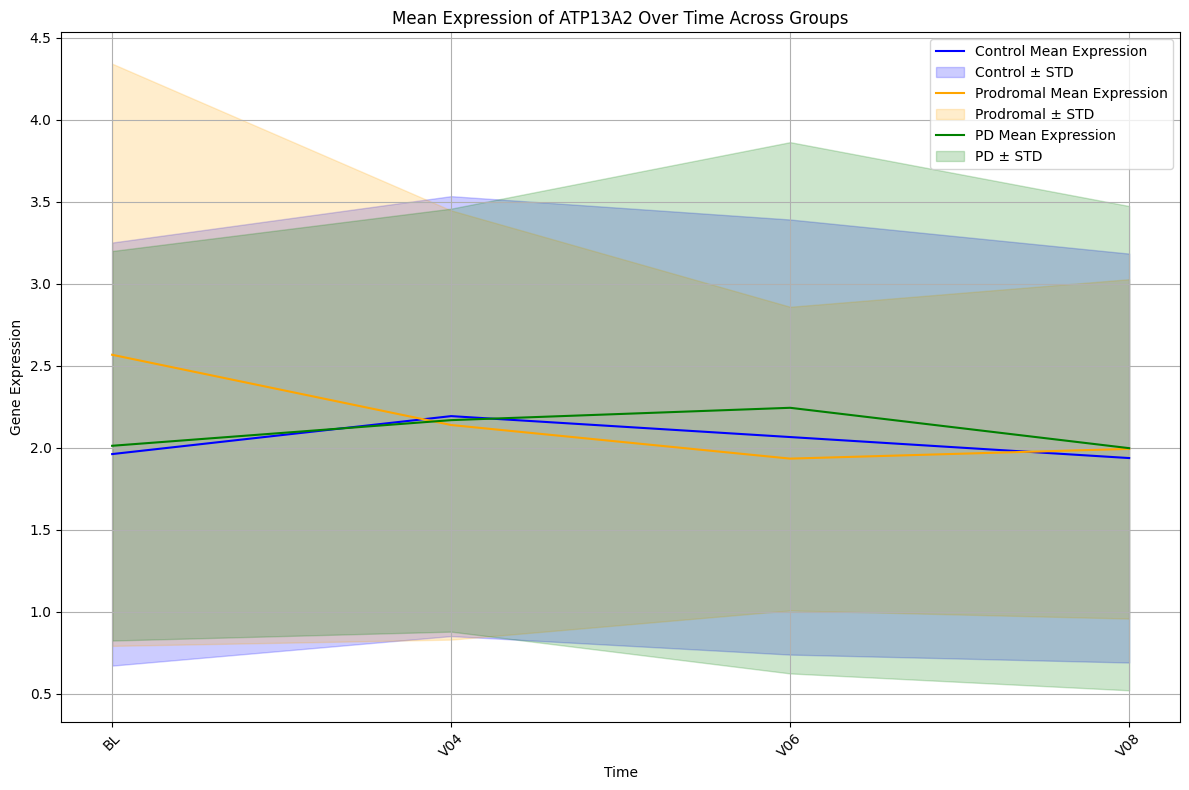

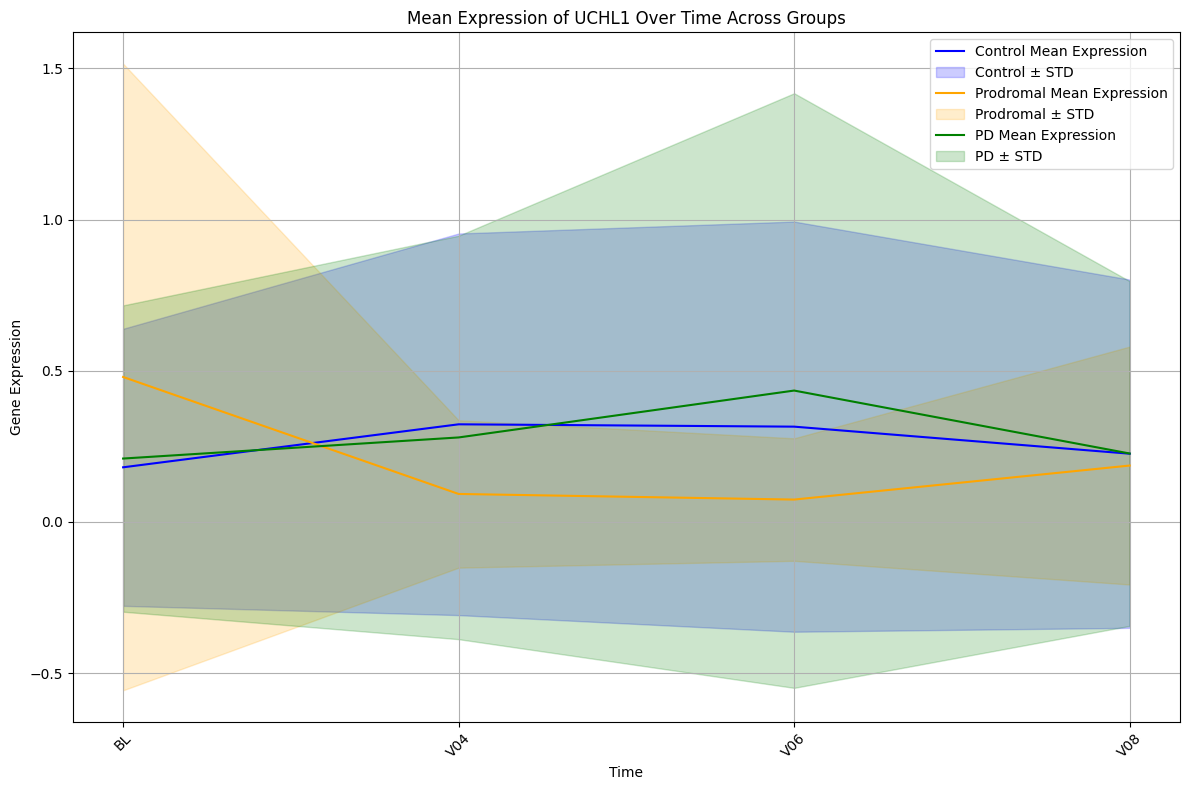

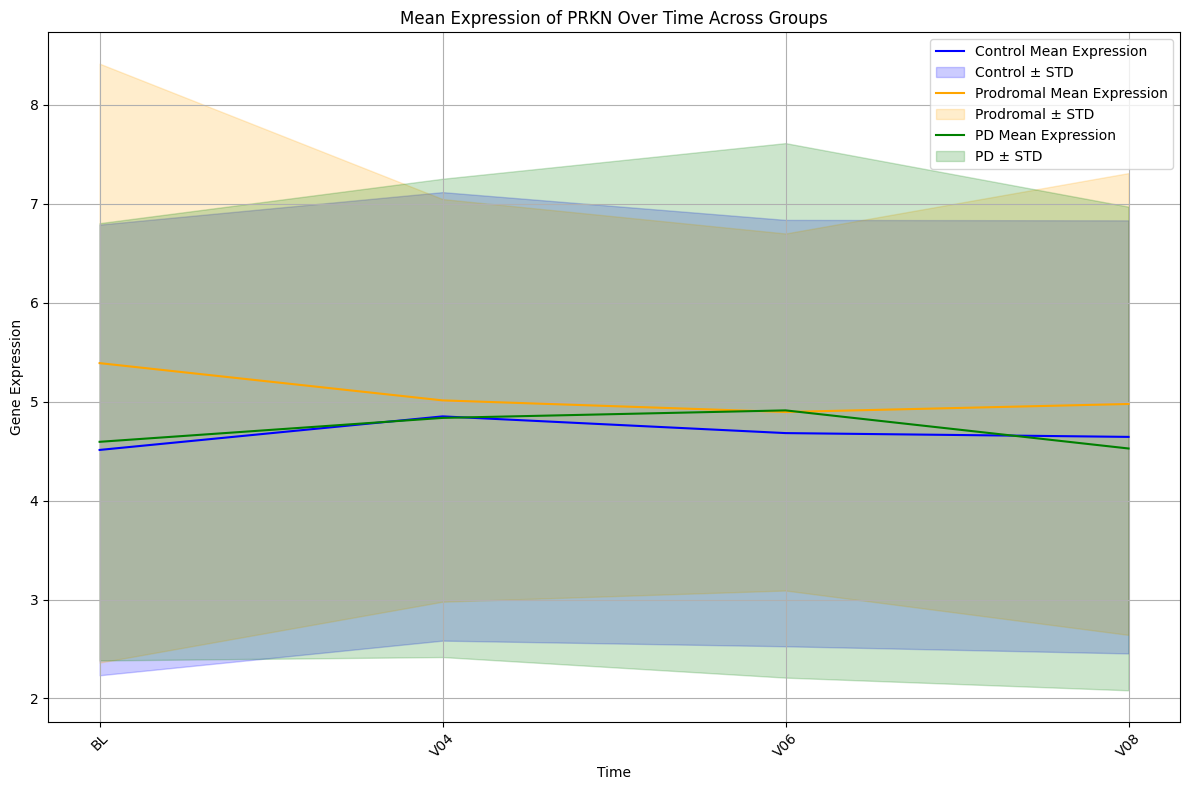

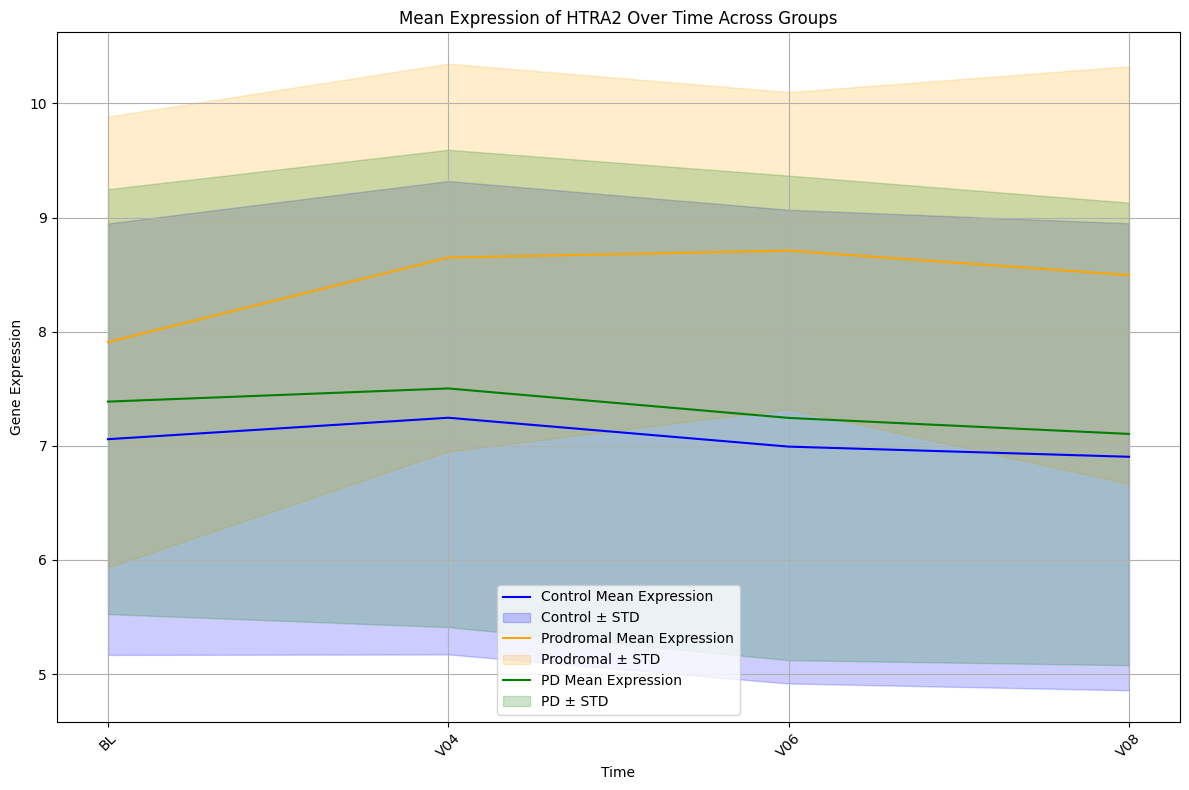

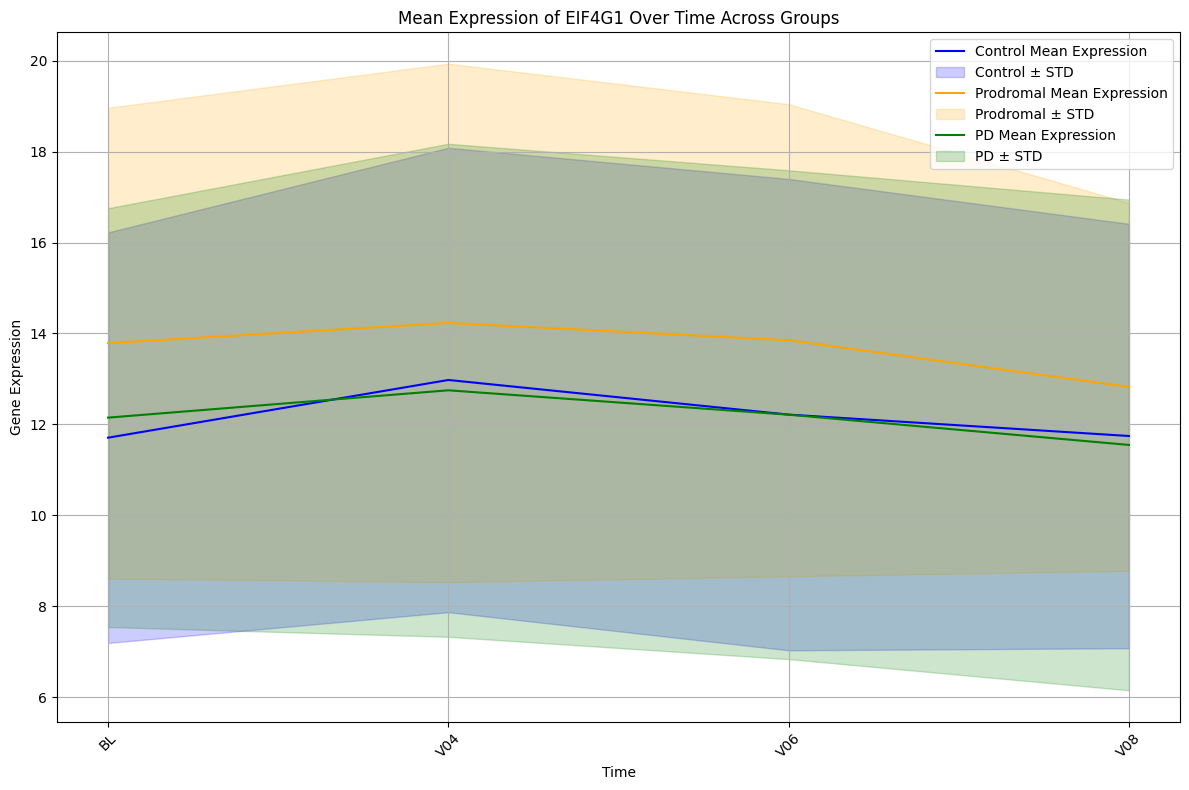

ENSG00000177628


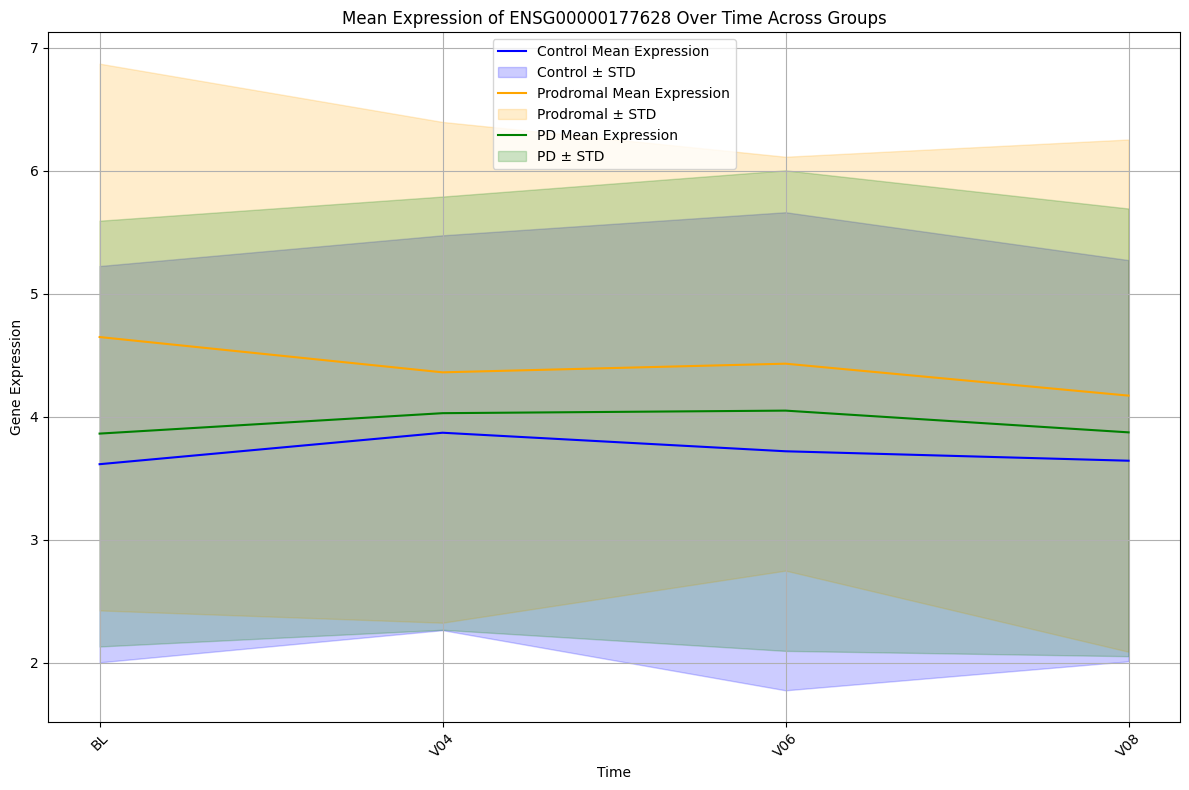

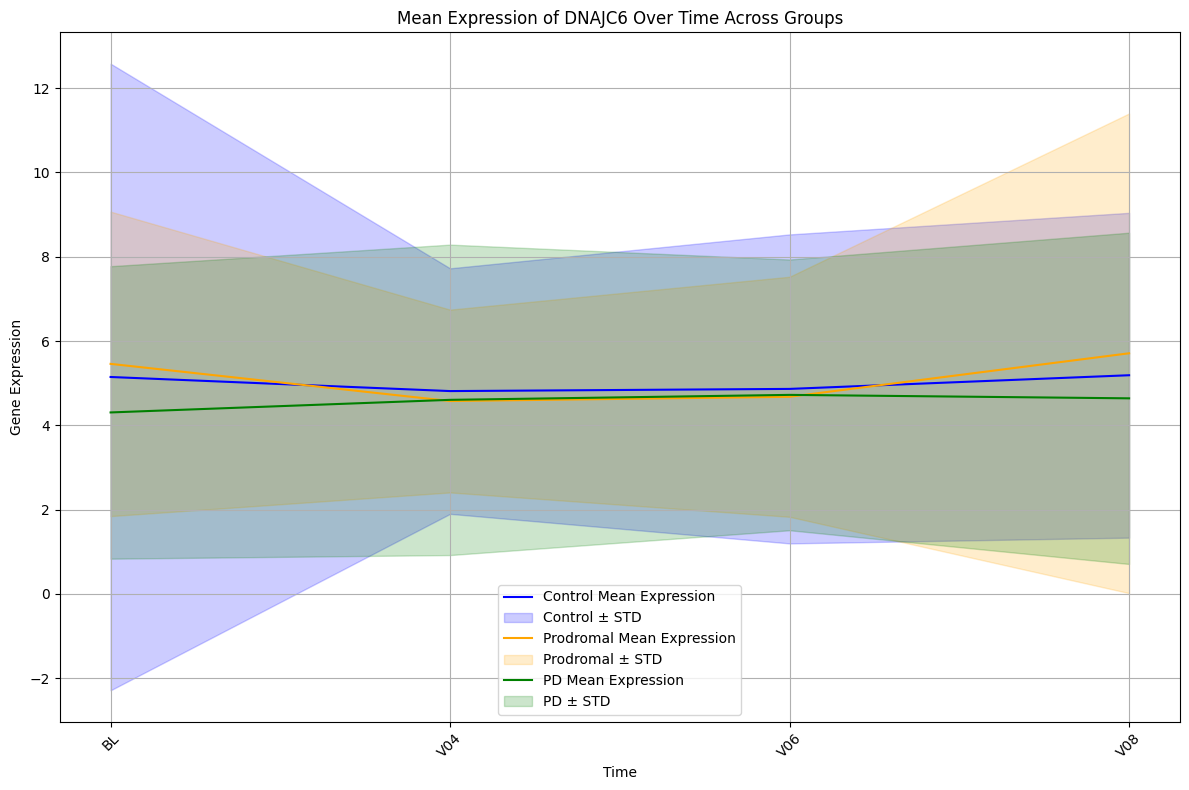

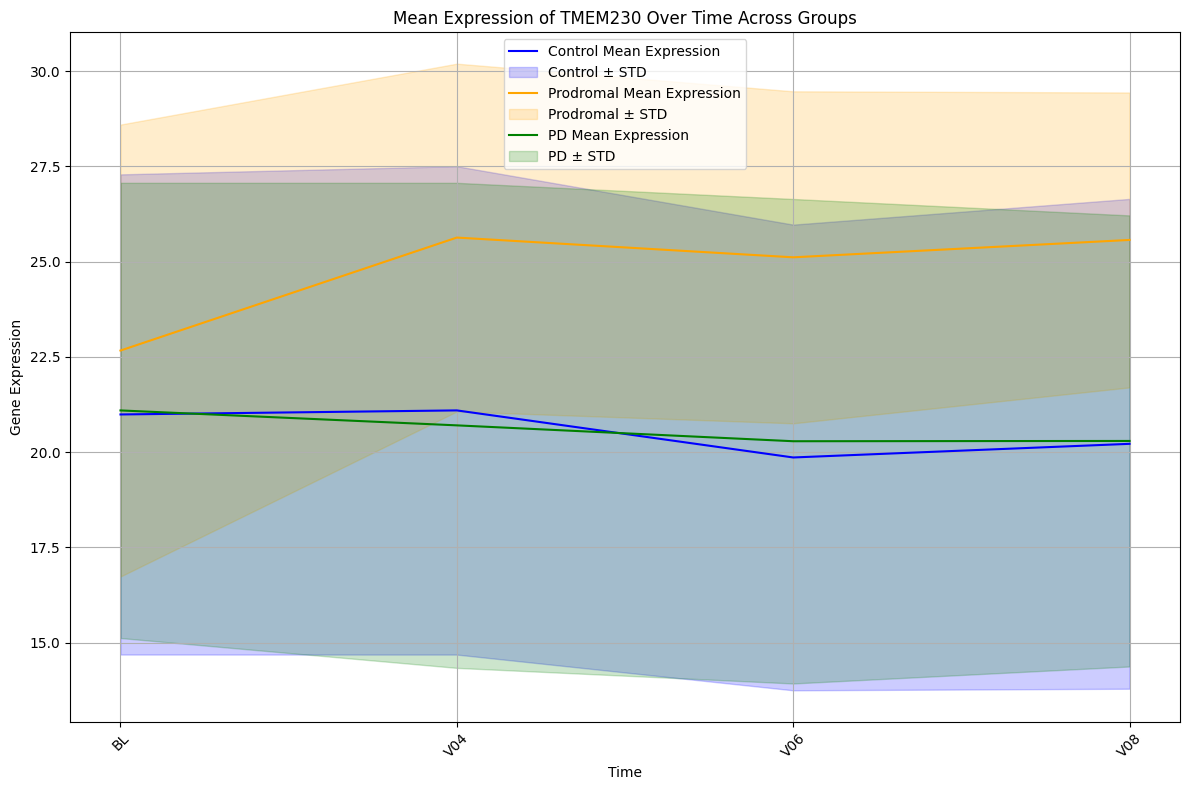

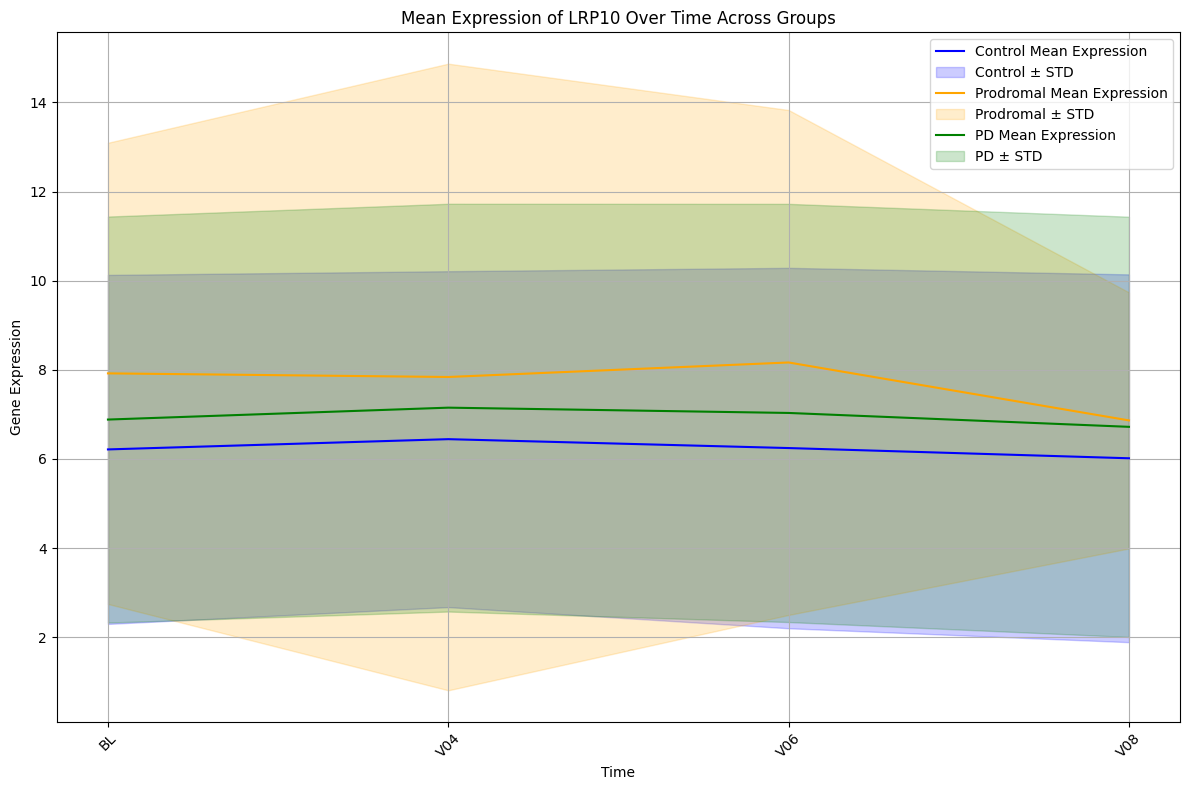

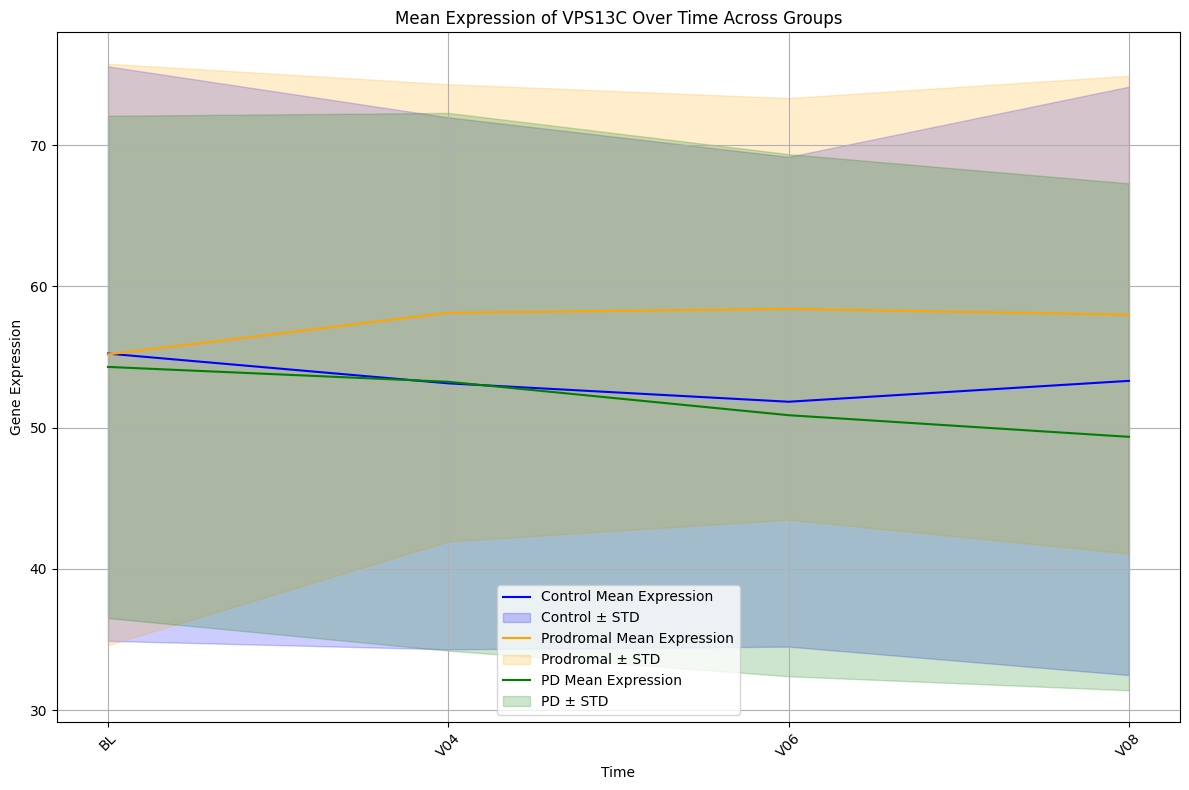

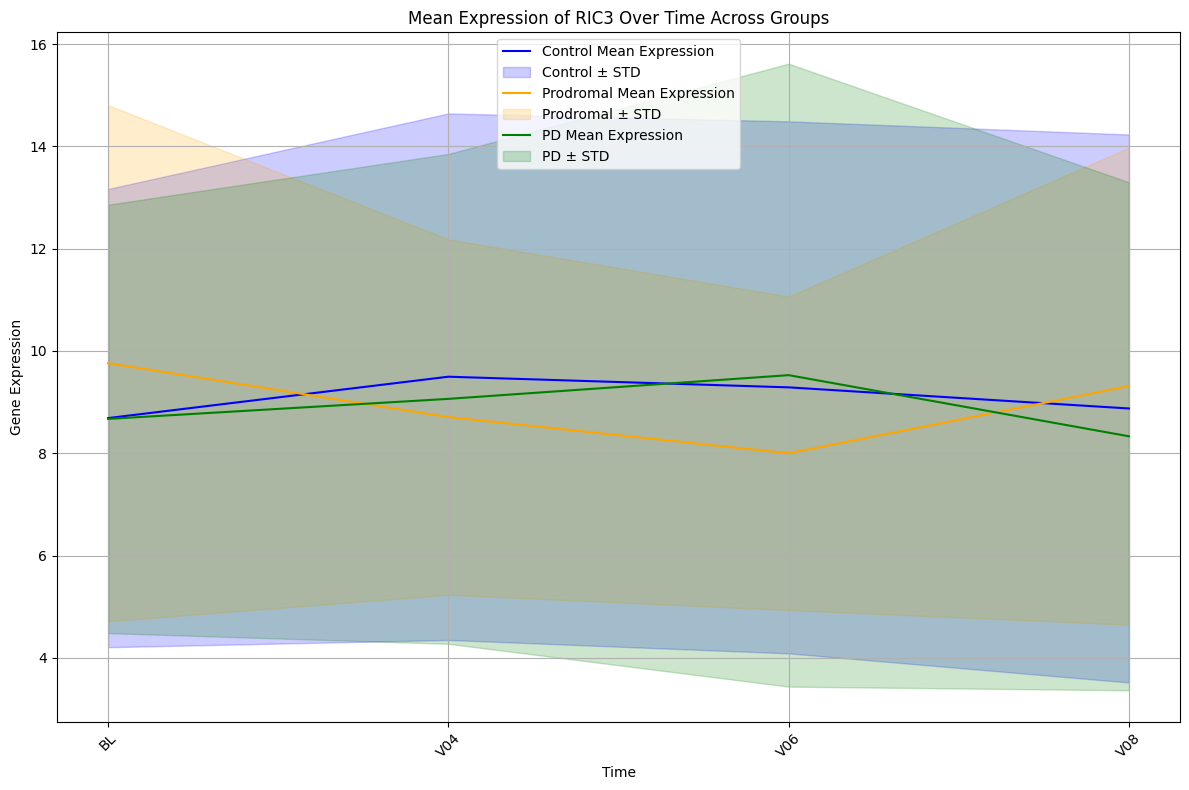

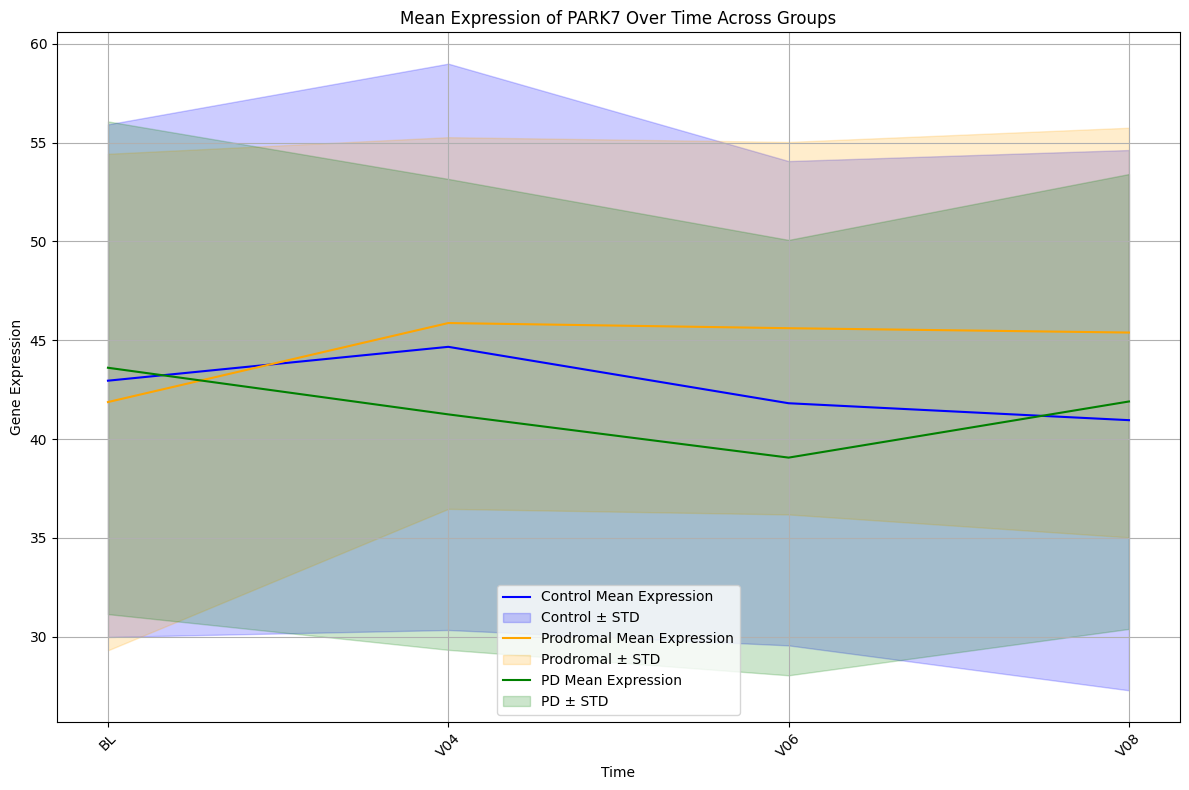

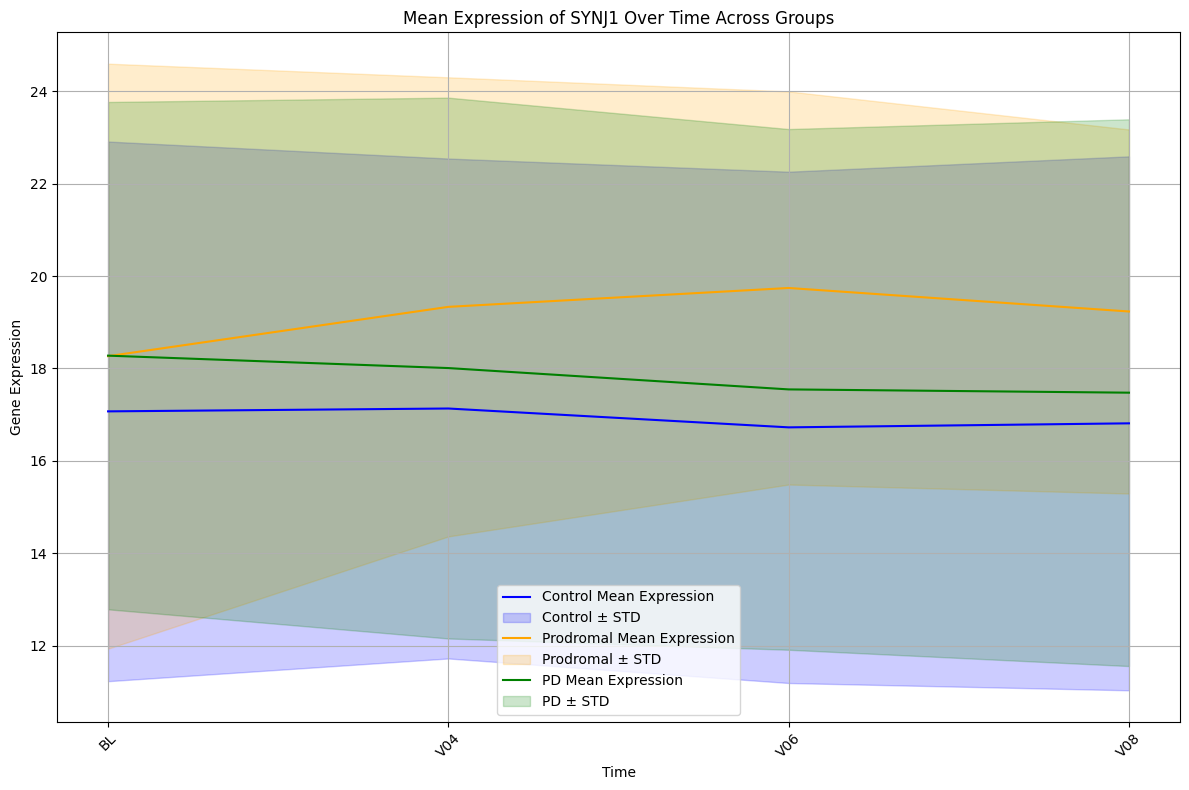

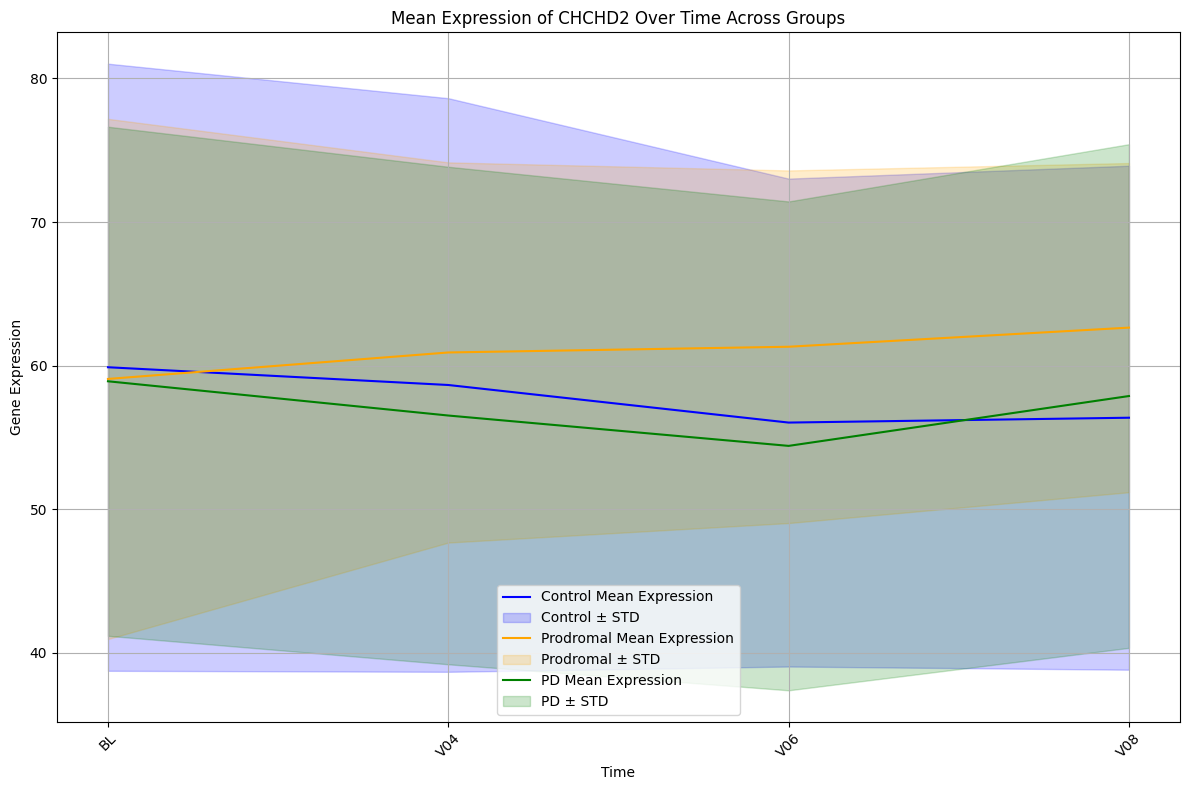

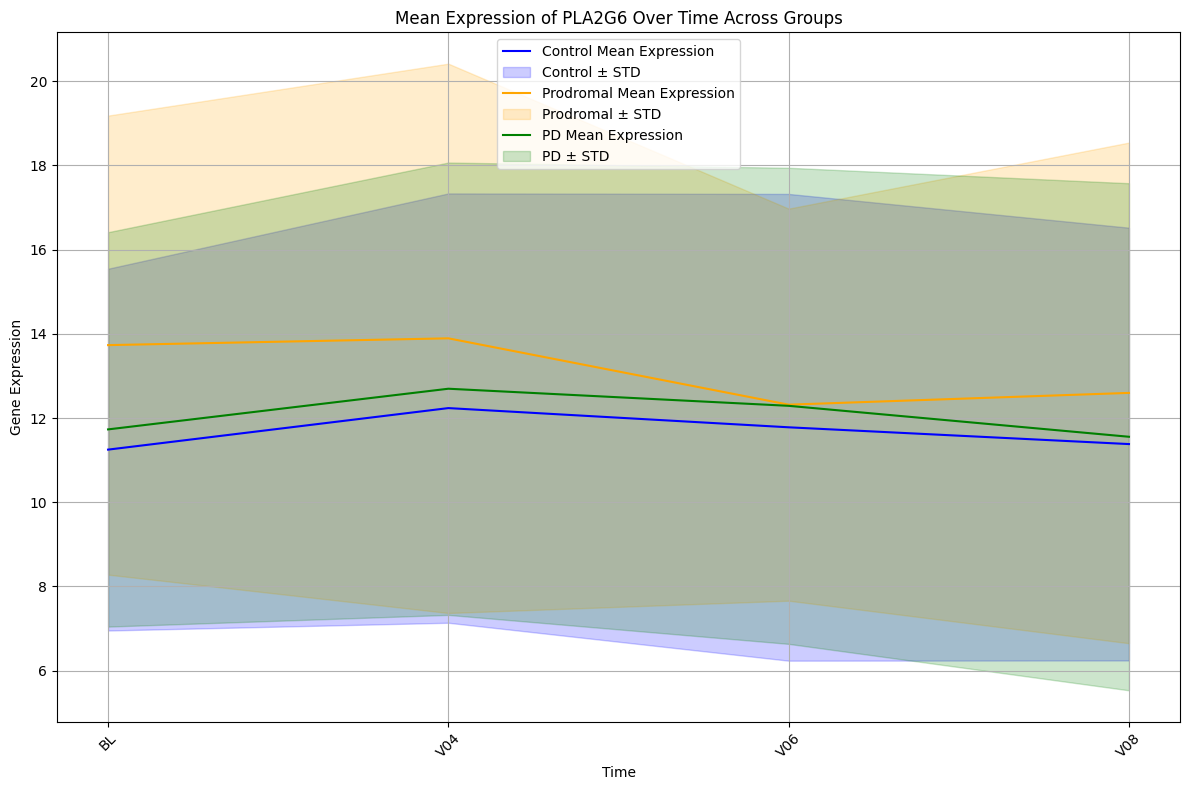

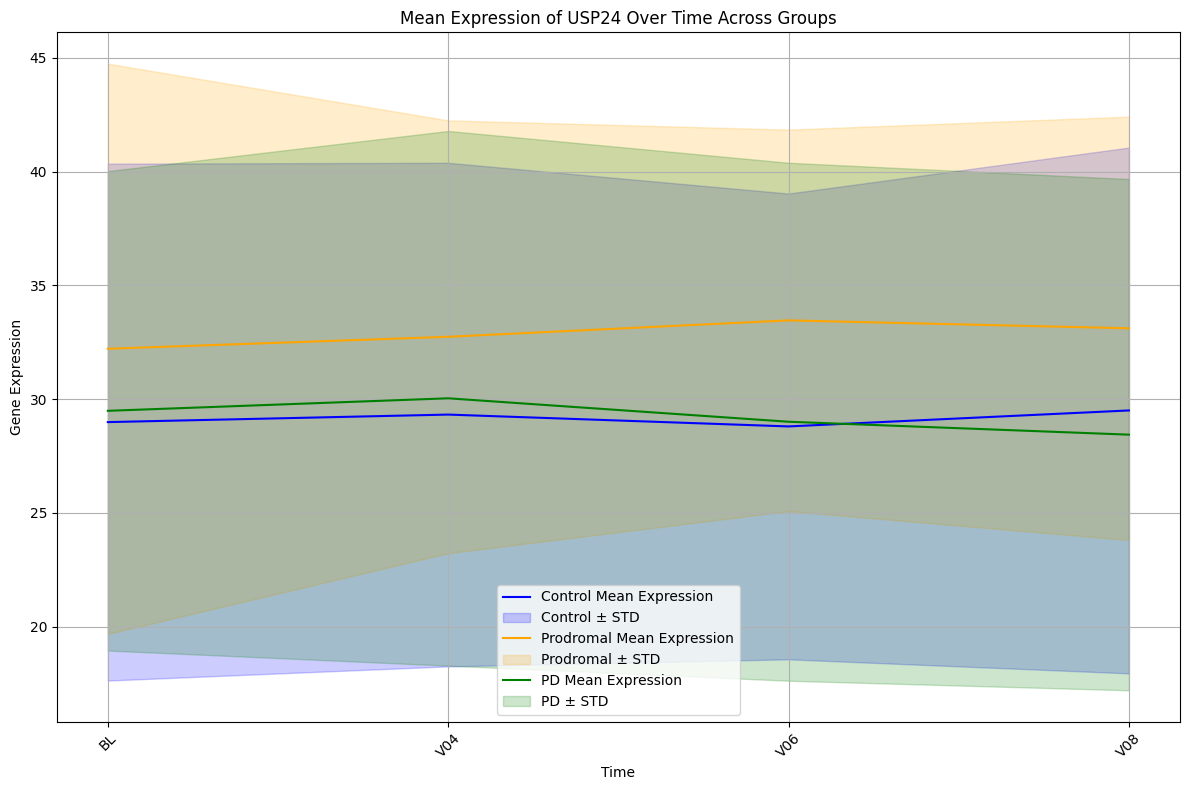

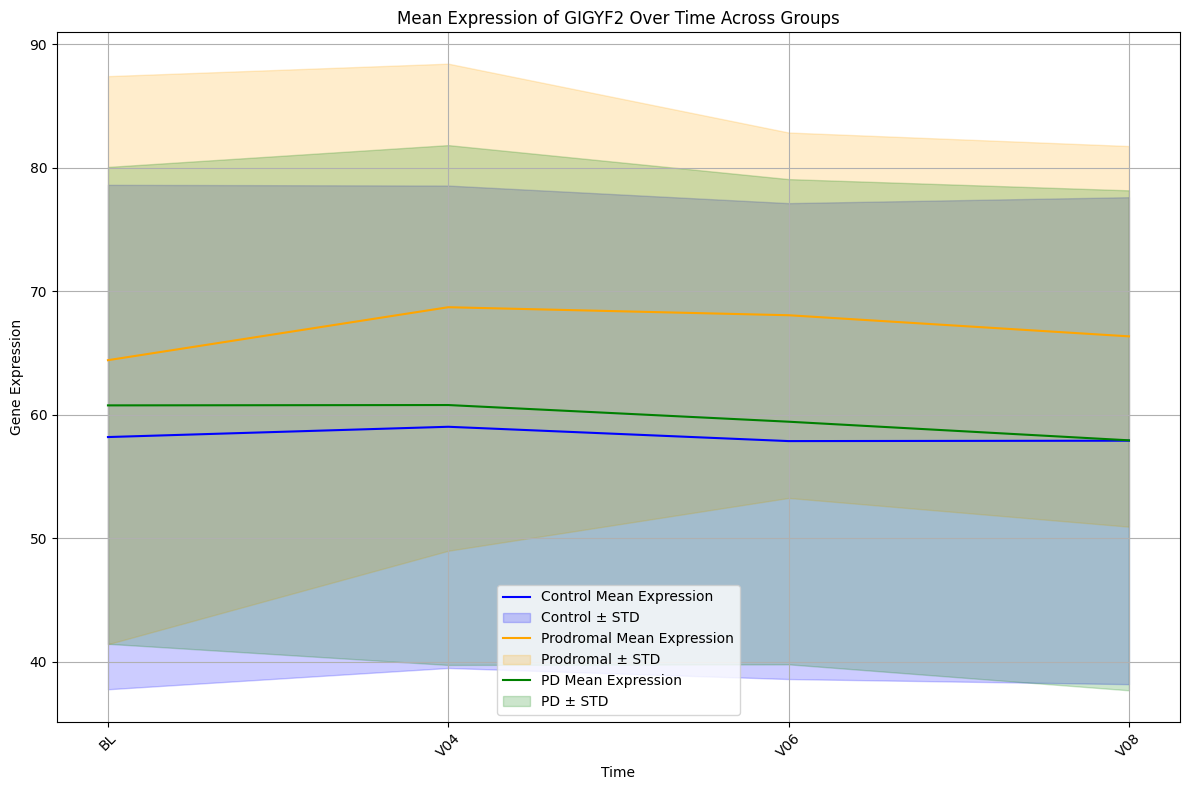

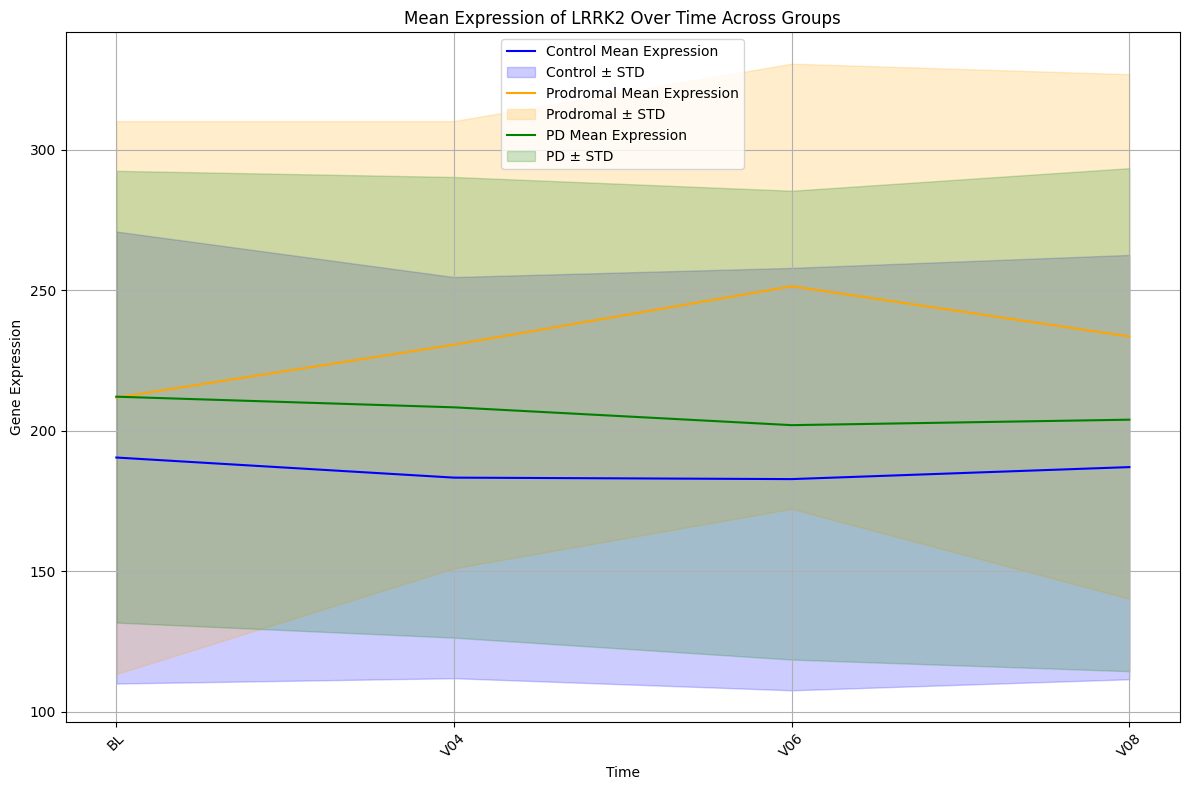

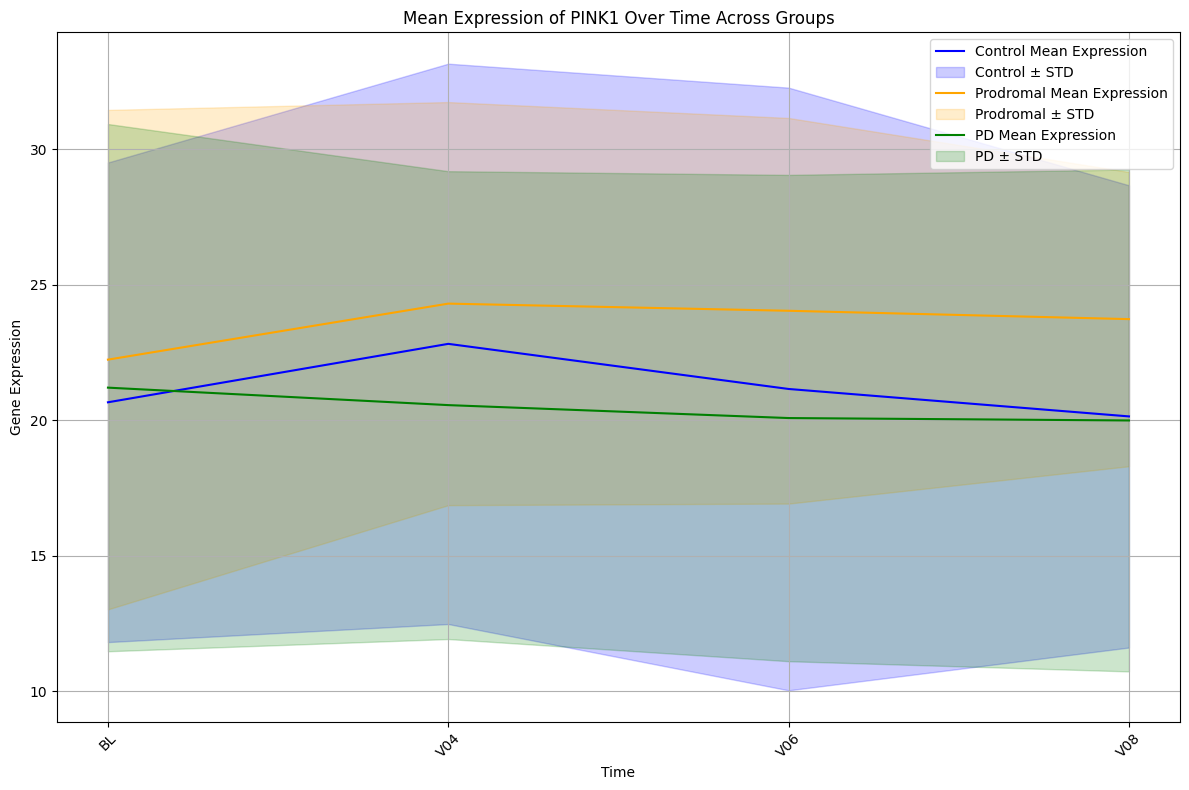

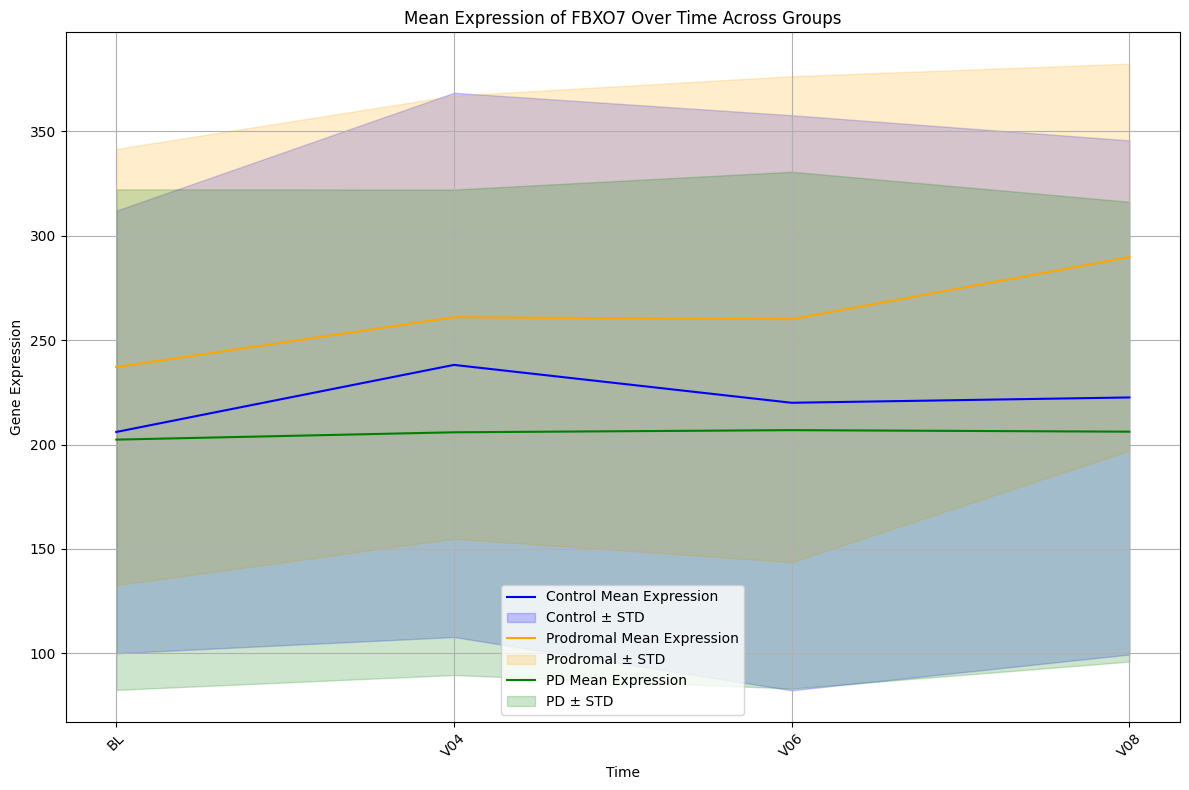

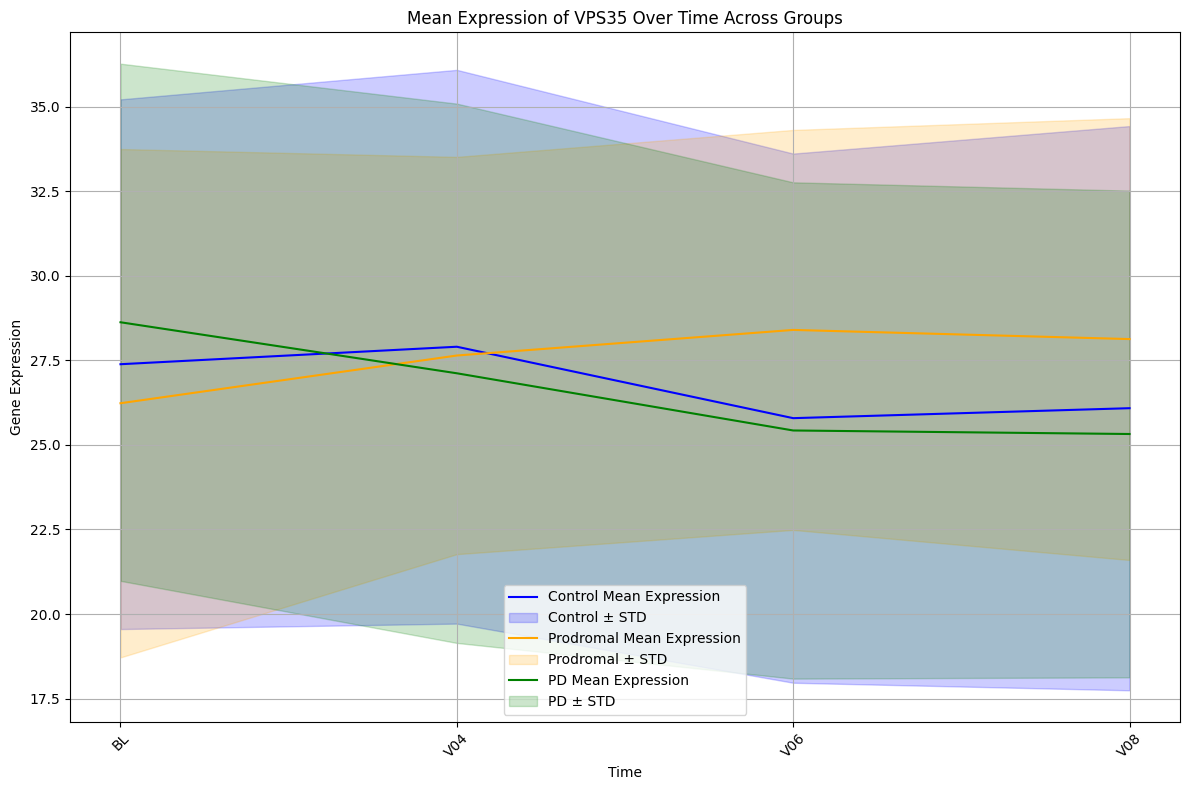

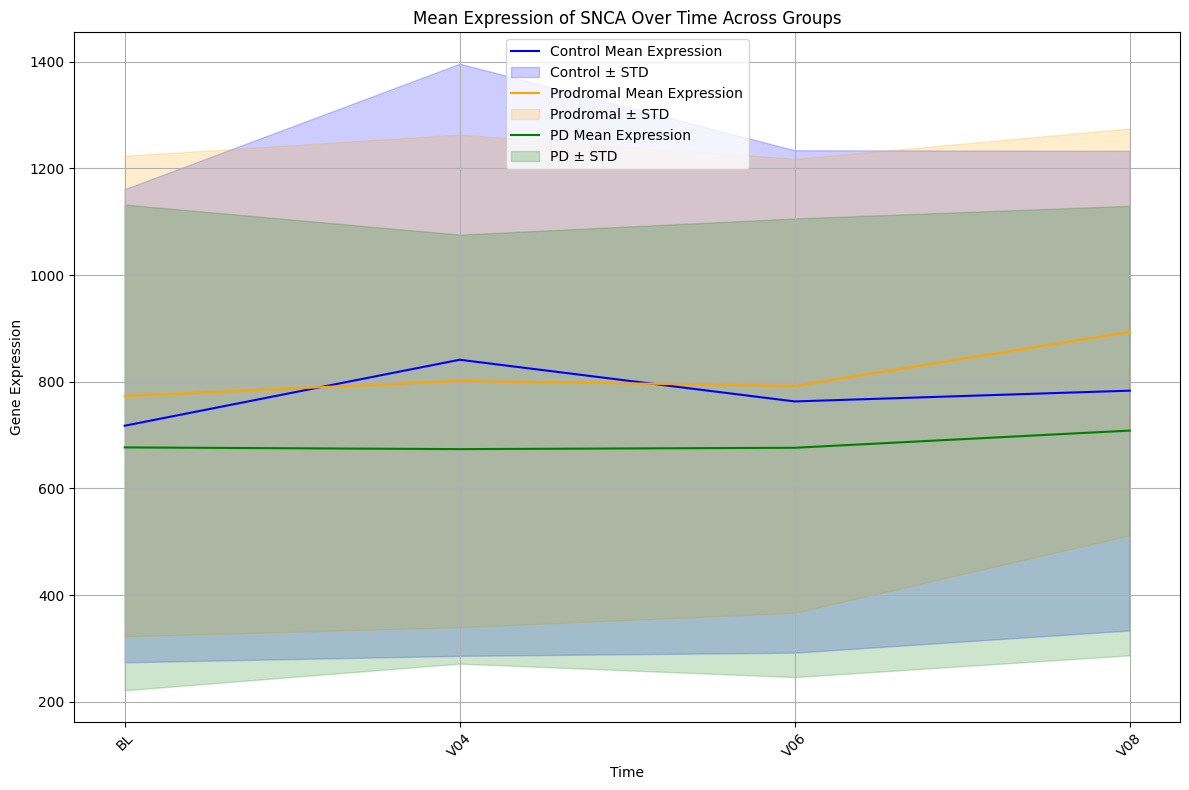

In [83]:
import matplotlib.pyplot as plt

# Loop through each gene
for gene in genes:
    # Create a new figure for each gene
    plt.figure(figsize=(12, 8))
    
    # Define a list to store the group data
    groups = ['Control', 'Prodromal', 'PD']
    colors = {'Control': 'blue', 'Prodromal': 'orange', 'PD': 'green'}
    
    for group in groups:
        # Filter and sort data by group
        group_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith(group)]
        group_tmp_data = group_tmp_data.sort_values(by='New_Time_Point')
        
        # Calculate mean and standard deviation
        mean_expression = group_tmp_data.groupby('New_Time_Point')[gene].mean()
        std_expression = group_tmp_data.groupby('New_Time_Point')[gene].std()
        
        # Extract clean time points
        index = [i.split('_')[1] for i in mean_expression.index]
        
        # Plot mean expression
        plt.plot(index, mean_expression, color=colors[group], label=f'{group} Mean Expression')
        
        # Fill the standard deviation area
        plt.fill_between(index,
                         mean_expression - std_expression,
                         mean_expression + std_expression,
                         color=colors[group], alpha=0.2, label=f'{group} ± STD')
    
    # Customize plot
    plt.xlabel('Time')
    plt.ylabel('Gene Expression')
    gene  = return_gene_name(gene)
    plt.title(f'Mean Expression of {gene} Over Time Across Groups')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()



In [84]:
FEATURE_IMPORTANCES.keys()

dict_keys(['PD_V08_Control_V08_0', 'PD_V08_Control_V08_1', 'PD_V08_Control_V08_2', 'PD_V08_Control_V08_3', 'PD_V08_Control_V08_4', 'PD_V08_Control_V08_5', 'PD_V08_Control_V08_6', 'PD_V08_Control_V08_7', 'PD_V08_Control_V08_8', 'PD_V08_Control_V08_9', 'PD_V08_Control_V08_10', 'PD_V08_Control_V08_11', 'PD_V08_Control_V08_12', 'PD_V08_Control_V08_13', 'PD_V08_Control_V08_14', 'PD_V08_Control_V08_15', 'PD_V08_Control_V08_16', 'PD_V08_Control_V08_17', 'PD_V08_Control_V08_18', 'PD_V08_Control_V08_19', 'PD_V08_Control_V08_20', 'PD_V08_Control_V08_21', 'PD_V08_Control_V08_22', 'PD_V08_Control_V08_23', 'PD_V08_Control_V08_24', 'PD_V08_Control_V08_25', 'PD_V08_Control_V08_26', 'PD_V08_Control_V08_27', 'PD_V08_Control_V08_28', 'PD_V08_Control_V08_29', 'PD_V08_Control_V08_30', 'PD_V08_Control_V08_31', 'PD_V08_Control_V08_32', 'PD_V08_Control_V08_33', 'PD_V08_Control_V08_34', 'PD_V08_Control_V08_35', 'PD_V08_Control_V08_36', 'PD_V08_Control_V08_37', 'PD_V08_Control_V08_38', 'PD_V08_Control_V08_39',

In [85]:
FEATURE_IMPORTANCES['PD_V04_Control_V04_153']

{'ENSG00000089063': 0.0008888697352883799,
 'ENSG00000166405': -0.020568582271785672,
 'ENSG00000106153': 0.001902322292840699,
 'ENSG00000159082': -0.012653368849026642,
 'ENSG00000116288': 0.05161471960150665,
 'ENSG00000069329': 0.040716349338928745,
 'ENSG00000116675': -0.03619825599550833,
 'ENSG00000154277': 0.34980070163104776,
 'ENSG00000159363': -0.059932904360419315,
 'ENSG00000185345': -0.08517094351363512,
 'ENSG00000204120': 0.012711371515076472,
 'ENSG00000129003': -0.001874570850609006,
 'ENSG00000197324': 0.054127872007857784,
 'ENSG00000158828': -0.029683988935063892,
 'ENSG00000115317': -0.20825628103299884,
 'ENSG00000114867': 0.05523258066324012,
 'ENSG00000162402': -0.0136609331428935,
 'ENSG00000188906': -0.00786784590044022,
 'ENSG00000100225': 0.004488253165292573,
 'ENSG00000184381': -0.071491989583076,
 'ENSG00000145335': 4.3221860049357326e-05,
 'ENSG00000177628': 0.03769697249949405}

In [86]:
compare_list = [ 'PD_BL_Control_BL',  'PD_V02_Control_V02' ,'PD_V04_Control_V04','PD_V06_Control_V06', 'PD_V08_Control_V08']

In [87]:
FEATURE_IMPORTANCES_PD_BL_Control_BL = dict()
FEATURE_IMPORTANCES_PD_V02_Control_V02 = dict()
FEATURE_IMPORTANCES_PD_V04_Control_V04 = dict()
FEATURE_IMPORTANCES_PD_V06_Control_V06 = dict()
FEATURE_IMPORTANCES_PD_V08_Control_V08 = dict()

for i in FEATURE_IMPORTANCES.keys():
    if 'PD_BL_Control_BL' in i:
        FEATURE_IMPORTANCES_PD_BL_Control_BL[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V02_Control_V02' in i:
        FEATURE_IMPORTANCES_PD_V02_Control_V02[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V04_Control_V04' in i:
        FEATURE_IMPORTANCES_PD_V04_Control_V04[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V06_Control_V06' in i:
        FEATURE_IMPORTANCES_PD_V06_Control_V06[i] = FEATURE_IMPORTANCES[i]

    elif 'PD_V08_Control_V08' in i:
        FEATURE_IMPORTANCES_PD_V08_Control_V08[i] = FEATURE_IMPORTANCES[i]
        
        

In [88]:
list(FEATURE_IMPORTANCES_PD_BL_Control_BL.keys())[:10]

['PD_BL_Control_BL_0',
 'PD_BL_Control_BL_1',
 'PD_BL_Control_BL_2',
 'PD_BL_Control_BL_3',
 'PD_BL_Control_BL_4',
 'PD_BL_Control_BL_5',
 'PD_BL_Control_BL_6',
 'PD_BL_Control_BL_7',
 'PD_BL_Control_BL_8',
 'PD_BL_Control_BL_9']

In [89]:
genes_list = list(FEATURE_IMPORTANCES_PD_BL_Control_BL['PD_BL_Control_BL_0'].keys())

In [90]:
genes_list[0:10]

['ENSG00000089063',
 'ENSG00000166405',
 'ENSG00000106153',
 'ENSG00000159082',
 'ENSG00000116288',
 'ENSG00000069329',
 'ENSG00000116675',
 'ENSG00000154277',
 'ENSG00000159363',
 'ENSG00000185345']

In [91]:
len(FEATURE_IMPORTANCES_PD_BL_Control_BL.keys())

1000

In [92]:
AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_BL_Control_BL.keys():
        s += FEATURE_IMPORTANCES_PD_BL_Control_BL[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_BL_Control_BL.keys())
    AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL[i] = s


AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V02_Control_V02.keys():
        s += FEATURE_IMPORTANCES_PD_V02_Control_V02[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V02_Control_V02.keys())
    AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02[i] = s


AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V04_Control_V04.keys():
        s += FEATURE_IMPORTANCES_PD_V04_Control_V04[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V04_Control_V04.keys())
    AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04[i] = s


AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V06_Control_V06.keys():
        s += FEATURE_IMPORTANCES_PD_V06_Control_V06[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V06_Control_V06.keys())
    AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06[i] = s


AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_PD_V08_Control_V08.keys():
        s += FEATURE_IMPORTANCES_PD_V08_Control_V08[k][i]
    s = s/len(FEATURE_IMPORTANCES_PD_V08_Control_V08.keys())
    AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08[i] = s
      

In [93]:
FEATURE_IMPORTANCES_MERGE = dict()
FEATURE_IMPORTANCES_MERGE['PD_BL_Control_BL'] = AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL
FEATURE_IMPORTANCES_MERGE['PD_V02_Control_V02'] = AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02
FEATURE_IMPORTANCES_MERGE['PD_V04_Control_V04'] = AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04
FEATURE_IMPORTANCES_MERGE['PD_V06_Control_V06'] = AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06
FEATURE_IMPORTANCES_MERGE['PD_V08_Control_V08'] = AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08


In [94]:
ranking_of_features = []
for i in compare_list:


    df = pd.DataFrame(FEATURE_IMPORTANCES_MERGE[i].items())
    df[2] = np.abs(df[1])
    df = df.sort_values(by = 2, ascending=False)
    print(df)
    ranking_of_features.append(df[0].tolist())


                  0         1         2
14  ENSG00000115317 -0.250098  0.250098
8   ENSG00000159363 -0.139162  0.139162
21  ENSG00000177628  0.119334  0.119334
0   ENSG00000089063  0.116756  0.116756
15  ENSG00000114867  0.114739  0.114739
19  ENSG00000184381 -0.090219  0.090219
3   ENSG00000159082  0.064846  0.064846
16  ENSG00000162402 -0.047271  0.047271
5   ENSG00000069329 -0.036387  0.036387
7   ENSG00000154277  0.032833  0.032833
12  ENSG00000197324 -0.029926  0.029926
6   ENSG00000116675  0.029398  0.029398
4   ENSG00000116288 -0.028976  0.028976
13  ENSG00000158828 -0.021536  0.021536
11  ENSG00000129003  0.016648  0.016648
2   ENSG00000106153  0.014346  0.014346
10  ENSG00000204120  0.012867  0.012867
1   ENSG00000166405  0.006840  0.006840
17  ENSG00000188906 -0.006457  0.006457
9   ENSG00000185345 -0.003000  0.003000
18  ENSG00000100225  0.001615  0.001615
20  ENSG00000145335  0.000005  0.000005
                  0         1         2
15  ENSG00000114867  0.293643  0.293643


In [95]:
ranking_of_features[4][0:10]

['ENSG00000154277',
 'ENSG00000159363',
 'ENSG00000185345',
 'ENSG00000115317',
 'ENSG00000116675',
 'ENSG00000114867',
 'ENSG00000069329',
 'ENSG00000129003',
 'ENSG00000177628',
 'ENSG00000166405']

In [96]:
gene_lists = ranking_of_features

In [97]:
gene_lists

[['ENSG00000115317',
  'ENSG00000159363',
  'ENSG00000177628',
  'ENSG00000089063',
  'ENSG00000114867',
  'ENSG00000184381',
  'ENSG00000159082',
  'ENSG00000162402',
  'ENSG00000069329',
  'ENSG00000154277',
  'ENSG00000197324',
  'ENSG00000116675',
  'ENSG00000116288',
  'ENSG00000158828',
  'ENSG00000129003',
  'ENSG00000106153',
  'ENSG00000204120',
  'ENSG00000166405',
  'ENSG00000188906',
  'ENSG00000185345',
  'ENSG00000100225',
  'ENSG00000145335'],
 ['ENSG00000114867',
  'ENSG00000115317',
  'ENSG00000159363',
  'ENSG00000154277',
  'ENSG00000197324',
  'ENSG00000184381',
  'ENSG00000069329',
  'ENSG00000162402',
  'ENSG00000089063',
  'ENSG00000185345',
  'ENSG00000129003',
  'ENSG00000116675',
  'ENSG00000106153',
  'ENSG00000166405',
  'ENSG00000116288',
  'ENSG00000159082',
  'ENSG00000158828',
  'ENSG00000177628',
  'ENSG00000204120',
  'ENSG00000100225',
  'ENSG00000188906',
  'ENSG00000145335'],
 ['ENSG00000115317',
  'ENSG00000177628',
  'ENSG00000154277',
  'ENSG0000

In [98]:
gene_indices = {}

# Loop through each list and index each gene
for list_idx, gene_list in enumerate(gene_lists):
    for gene_idx, gene in enumerate(gene_list):
        # Initialize the gene's entry if not present
        if gene not in gene_indices:
            gene_indices[gene] = [-1] * len(gene_lists)  # Default -1 for lists where gene is absent
        # Update the index of the gene in the current list
        gene_indices[gene][list_idx] = gene_idx

# Display results
for gene, indices in gene_indices.items():
    print(f"{gene}: {indices}")

ENSG00000115317: [0, 1, 0, 10, 3]
ENSG00000159363: [1, 2, 3, 2, 1]
ENSG00000177628: [2, 17, 1, 4, 8]
ENSG00000089063: [3, 8, 10, 6, 12]
ENSG00000114867: [4, 0, 5, 11, 5]
ENSG00000184381: [5, 5, 4, 17, 19]
ENSG00000159082: [6, 15, 16, 3, 13]
ENSG00000162402: [7, 7, 9, 8, 16]
ENSG00000069329: [8, 6, 8, 9, 6]
ENSG00000154277: [9, 3, 2, 1, 0]
ENSG00000197324: [10, 4, 15, 15, 11]
ENSG00000116675: [11, 11, 7, 20, 4]
ENSG00000116288: [12, 14, 6, 7, 10]
ENSG00000158828: [13, 16, 11, 14, 14]
ENSG00000129003: [14, 10, 13, 13, 7]
ENSG00000106153: [15, 12, 20, 12, 15]
ENSG00000204120: [16, 18, 19, 5, 18]
ENSG00000166405: [17, 13, 14, 19, 9]
ENSG00000188906: [18, 20, 17, 16, 17]
ENSG00000185345: [19, 9, 12, 0, 2]
ENSG00000100225: [20, 19, 18, 18, 20]
ENSG00000145335: [21, 21, 21, 21, 21]


In [99]:
ranking_df = pd.DataFrame(gene_indices).T
ranking_df.columns = ['BL','V02','V04','V06','V08']

In [100]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

In [101]:
tmp_df = ranking_df.reset_index()
ranking_df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()

In [102]:
ranking_df.loc['ENSG00000177628','Gene_Name'] = 'GBA1'
ranking_df.set_index('Gene_Name',inplace=True)
ranking_df

BL  V02  V04  V06  V08
Gene_Name                        
HTRA2       0    1    0   10    3
ATP13A2     1    2    3    2    1
GBA1        2   17    1    4    8
TMEM230     3    8   10    6   12
EIF4G1      4    0    5   11    5
PLA2G6      5    5    4   17   19
SYNJ1       6   15   16    3   13
USP24       7    7    9    8   16
VPS35       8    6    8    9    6
UCHL1       9    3    2    1    0
LRP10      10    4   15   15   11
DNAJC6     11   11    7   20    4
PARK7      12   14    6    7   10
PINK1      13   16   11   14   14
VPS13C     14   10   13   13    7
CHCHD2     15   12   20   12   15
GIGYF2     16   18   19    5   18
RIC3       17   13   14   19    9
LRRK2      18   20   17   16   17
PRKN       19    9   12    0    2
FBXO7      20   19   18   18   20
SNCA       21   21   21   21   21

In [111]:
ranking_df

BL  V02  V04  V06  V08
Gene_Name                        
GBA1        0    6   15    3    6
ATP13A2     1    2    0    1    3
UCHL1       2   10    2    5   13
EIF4G1      3   12   13    7   10
SYNJ1       4    9    5    8    9
USP24       5    3   17   10    7
PRKN        6   15    8   19   12
HTRA2       7    0    1    0   18
PLA2G6      8   16    7    4    2
VPS13C      9    8   19   17    8
DNAJC6     10    4   10    9   11
VPS35      11    1    4    6    5
PINK1      12    5   16   16   14
PARK7      13    7    9   13   19
GIGYF2     14   18   12   15    1
CHCHD2     15   20   11   11    4
LRP10      16   13    6   12   15
RIC3       17   14   14   14   20
LRRK2      18   17   18   18   17
FBXO7      19   19   21   20   16
TMEM230    20   11    3    2    0
SNCA       21   21   20   21   21

In [103]:
ranking_df.to_csv('ranking_df/standard_pd_genes_control_to_pd_ranking_df.csv', index=True)

In [104]:
!pwd

/12tb_dsk3/PD_classifier/with_smug_1/New_Gene_sets


In [105]:
ranking_of_features

[['ENSG00000115317',
  'ENSG00000159363',
  'ENSG00000177628',
  'ENSG00000089063',
  'ENSG00000114867',
  'ENSG00000184381',
  'ENSG00000159082',
  'ENSG00000162402',
  'ENSG00000069329',
  'ENSG00000154277',
  'ENSG00000197324',
  'ENSG00000116675',
  'ENSG00000116288',
  'ENSG00000158828',
  'ENSG00000129003',
  'ENSG00000106153',
  'ENSG00000204120',
  'ENSG00000166405',
  'ENSG00000188906',
  'ENSG00000185345',
  'ENSG00000100225',
  'ENSG00000145335'],
 ['ENSG00000114867',
  'ENSG00000115317',
  'ENSG00000159363',
  'ENSG00000154277',
  'ENSG00000197324',
  'ENSG00000184381',
  'ENSG00000069329',
  'ENSG00000162402',
  'ENSG00000089063',
  'ENSG00000185345',
  'ENSG00000129003',
  'ENSG00000116675',
  'ENSG00000106153',
  'ENSG00000166405',
  'ENSG00000116288',
  'ENSG00000159082',
  'ENSG00000158828',
  'ENSG00000177628',
  'ENSG00000204120',
  'ENSG00000100225',
  'ENSG00000188906',
  'ENSG00000145335'],
 ['ENSG00000115317',
  'ENSG00000177628',
  'ENSG00000154277',
  'ENSG0000

In [106]:
subset_dict = {key: gene_indices[key] for key in ranking_of_features[4] if key in gene_indices}

print(subset_dict)

{'ENSG00000154277': [9, 3, 2, 1, 0], 'ENSG00000159363': [1, 2, 3, 2, 1], 'ENSG00000185345': [19, 9, 12, 0, 2], 'ENSG00000115317': [0, 1, 0, 10, 3], 'ENSG00000116675': [11, 11, 7, 20, 4], 'ENSG00000114867': [4, 0, 5, 11, 5], 'ENSG00000069329': [8, 6, 8, 9, 6], 'ENSG00000129003': [14, 10, 13, 13, 7], 'ENSG00000177628': [2, 17, 1, 4, 8], 'ENSG00000166405': [17, 13, 14, 19, 9], 'ENSG00000116288': [12, 14, 6, 7, 10], 'ENSG00000197324': [10, 4, 15, 15, 11], 'ENSG00000089063': [3, 8, 10, 6, 12], 'ENSG00000159082': [6, 15, 16, 3, 13], 'ENSG00000158828': [13, 16, 11, 14, 14], 'ENSG00000106153': [15, 12, 20, 12, 15], 'ENSG00000162402': [7, 7, 9, 8, 16], 'ENSG00000188906': [18, 20, 17, 16, 17], 'ENSG00000204120': [16, 18, 19, 5, 18], 'ENSG00000184381': [5, 5, 4, 17, 19], 'ENSG00000100225': [20, 19, 18, 18, 20], 'ENSG00000145335': [21, 21, 21, 21, 21]}


In [107]:
len(subset_dict)

22

In [108]:
subset_dict.values()

dict_values([[9, 3, 2, 1, 0], [1, 2, 3, 2, 1], [19, 9, 12, 0, 2], [0, 1, 0, 10, 3], [11, 11, 7, 20, 4], [4, 0, 5, 11, 5], [8, 6, 8, 9, 6], [14, 10, 13, 13, 7], [2, 17, 1, 4, 8], [17, 13, 14, 19, 9], [12, 14, 6, 7, 10], [10, 4, 15, 15, 11], [3, 8, 10, 6, 12], [6, 15, 16, 3, 13], [13, 16, 11, 14, 14], [15, 12, 20, 12, 15], [7, 7, 9, 8, 16], [18, 20, 17, 16, 17], [16, 18, 19, 5, 18], [5, 5, 4, 17, 19], [20, 19, 18, 18, 20], [21, 21, 21, 21, 21]])

In [109]:
# Original dictionary with gene rankings
'''gene_ranks = subset_dict


# Flatten the list to find the min and max values across all rankings
all_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]
min_rank, max_rank = min(all_ranks), max(all_ranks)

# Normalize each ranking
normalized_gene_ranks = {
    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]
    for gene, ranks in gene_ranks.items()
}

# Display the normalized rankings
for gene, normalized_ranks in normalized_gene_ranks.items():
    print(f"{gene}: {normalized_ranks}")
'''

'gene_ranks = subset_dict\n\n\n# Flatten the list to find the min and max values across all rankings\nall_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]\nmin_rank, max_rank = min(all_ranks), max(all_ranks)\n\n# Normalize each ranking\nnormalized_gene_ranks = {\n    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]\n    for gene, ranks in gene_ranks.items()\n}\n\n# Display the normalized rankings\nfor gene, normalized_ranks in normalized_gene_ranks.items():\n    print(f"{gene}: {normalized_ranks}")\n'

In [110]:
gene_ranks = subset_dict
df = pd.DataFrame(gene_ranks).T
df

0   1   2   3   4
ENSG00000154277   9   3   2   1   0
ENSG00000159363   1   2   3   2   1
ENSG00000185345  19   9  12   0   2
ENSG00000115317   0   1   0  10   3
ENSG00000116675  11  11   7  20   4
ENSG00000114867   4   0   5  11   5
ENSG00000069329   8   6   8   9   6
ENSG00000129003  14  10  13  13   7
ENSG00000177628   2  17   1   4   8
ENSG00000166405  17  13  14  19   9
ENSG00000116288  12  14   6   7  10
ENSG00000197324  10   4  15  15  11
ENSG00000089063   3   8  10   6  12
ENSG00000159082   6  15  16   3  13
ENSG00000158828  13  16  11  14  14
ENSG00000106153  15  12  20  12  15
ENSG00000162402   7   7   9   8  16
ENSG00000188906  18  20  17  16  17
ENSG00000204120  16  18  19   5  18
ENSG00000184381   5   5   4  17  19
ENSG00000100225  20  19  18  18  20
ENSG00000145335  21  21  21  21  21

In [111]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

tmp_df = df.reset_index()
df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()
df.loc['ENSG00000177628','Gene_Name'] = 'GBA1'
df.set_index('Gene_Name',inplace=True)

In [112]:
df

0   1   2   3   4
Gene_Name                    
UCHL1       9   3   2   1   0
ATP13A2     1   2   3   2   1
PRKN       19   9  12   0   2
HTRA2       0   1   0  10   3
DNAJC6     11  11   7  20   4
EIF4G1      4   0   5  11   5
VPS35       8   6   8   9   6
VPS13C     14  10  13  13   7
GBA1        2  17   1   4   8
RIC3       17  13  14  19   9
PARK7      12  14   6   7  10
LRP10      10   4  15  15  11
TMEM230     3   8  10   6  12
SYNJ1       6  15  16   3  13
PINK1      13  16  11  14  14
CHCHD2     15  12  20  12  15
USP24       7   7   9   8  16
LRRK2      18  20  17  16  17
GIGYF2     16  18  19   5  18
PLA2G6      5   5   4  17  19
FBXO7      20  19  18  18  20
SNCA       21  21  21  21  21

In [119]:
df.shape

(22, 5)

In [113]:
ranked_df = df.rank(axis=0, method='min').astype(int)

print(ranked_df)

            0   1   2   3   4
Gene_Name                    
UCHL1      10   4   3   2   1
ATP13A2     2   3   4   3   2
PRKN       20  10  13   1   3
HTRA2       1   2   1  11   4
DNAJC6     12  12   8  21   5
EIF4G1      5   1   6  12   6
VPS35       9   7   9  10   7
VPS13C     15  11  14  14   8
GBA1        3  18   2   5   9
RIC3       18  14  15  20  10
PARK7      13  15   7   8  11
LRP10      11   5  16  16  12
TMEM230     4   9  11   7  13
SYNJ1       7  16  17   4  14
PINK1      14  17  12  15  15
CHCHD2     16  13  21  13  16
USP24       8   8  10   9  17
LRRK2      19  21  18  17  18
GIGYF2     17  19  20   6  19
PLA2G6      6   6   5  18  20
FBXO7      21  20  19  19  21
SNCA       22  22  22  22  22


In [114]:
reversed_ranks = ranked_df .max() - ranked_df  + 1

print(reversed_ranks)

            0   1   2   3   4
Gene_Name                    
UCHL1      13  19  20  21  22
ATP13A2    21  20  19  20  21
PRKN        3  13  10  22  20
HTRA2      22  21  22  12  19
DNAJC6     11  11  15   2  18
EIF4G1     18  22  17  11  17
VPS35      14  16  14  13  16
VPS13C      8  12   9   9  15
GBA1       20   5  21  18  14
RIC3        5   9   8   3  13
PARK7      10   8  16  15  12
LRP10      12  18   7   7  11
TMEM230    19  14  12  16  10
SYNJ1      16   7   6  19   9
PINK1       9   6  11   8   8
CHCHD2      7  10   2  10   7
USP24      15  15  13  14   6
LRRK2       4   2   5   6   5
GIGYF2      6   4   3  17   4
PLA2G6     17  17  18   5   3
FBXO7       2   3   4   4   2
SNCA        1   1   1   1   1


In [115]:
rank_dict = reversed_ranks.T.to_dict(orient='list')
rank_dict

{'UCHL1': [13, 19, 20, 21, 22],
 'ATP13A2': [21, 20, 19, 20, 21],
 'PRKN': [3, 13, 10, 22, 20],
 'HTRA2': [22, 21, 22, 12, 19],
 'DNAJC6': [11, 11, 15, 2, 18],
 'EIF4G1': [18, 22, 17, 11, 17],
 'VPS35': [14, 16, 14, 13, 16],
 'VPS13C': [8, 12, 9, 9, 15],
 'GBA1': [20, 5, 21, 18, 14],
 'RIC3': [5, 9, 8, 3, 13],
 'PARK7': [10, 8, 16, 15, 12],
 'LRP10': [12, 18, 7, 7, 11],
 'TMEM230': [19, 14, 12, 16, 10],
 'SYNJ1': [16, 7, 6, 19, 9],
 'PINK1': [9, 6, 11, 8, 8],
 'CHCHD2': [7, 10, 2, 10, 7],
 'USP24': [15, 15, 13, 14, 6],
 'LRRK2': [4, 2, 5, 6, 5],
 'GIGYF2': [6, 4, 3, 17, 4],
 'PLA2G6': [17, 17, 18, 5, 3],
 'FBXO7': [2, 3, 4, 4, 2],
 'SNCA': [1, 1, 1, 1, 1]}

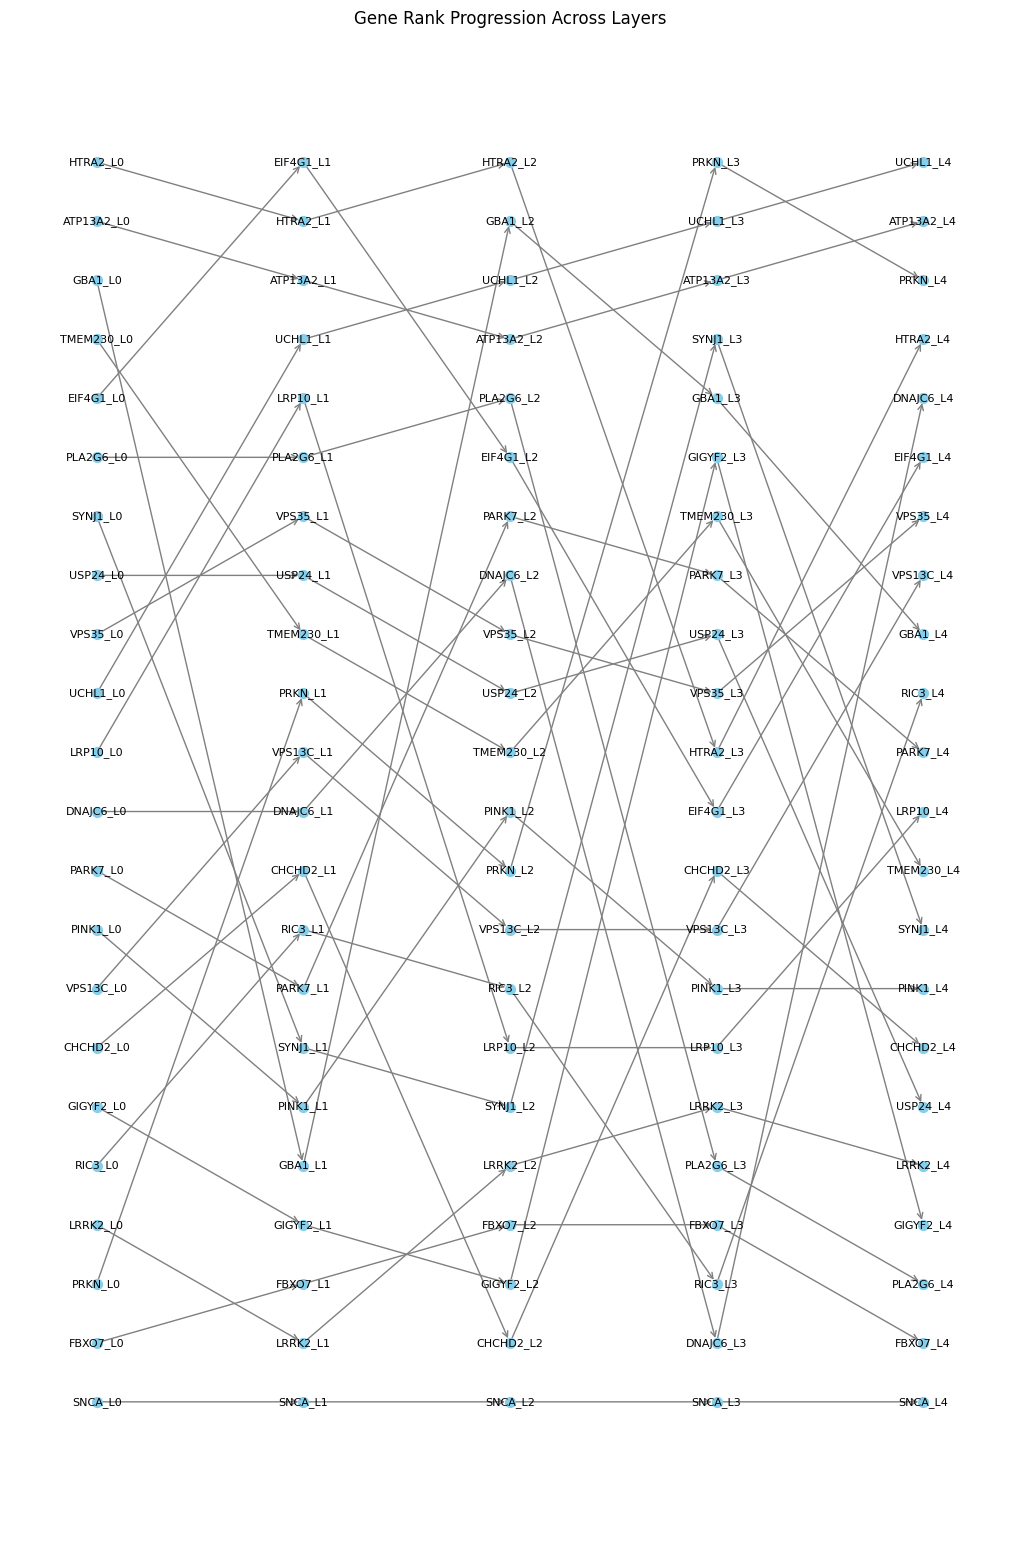

In [116]:
import matplotlib.pyplot as plt
import networkx as nx

# The rank positions for each gene across four layers
gene_ranks = rank_dict

G = nx.DiGraph()

# Number of layers
num_layers = len(next(iter(gene_ranks.values())))

# Add nodes and edges for each gene across the layers
for gene, ranks in gene_ranks.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

plt.title("Gene Rank Progression Across Layers")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.show()

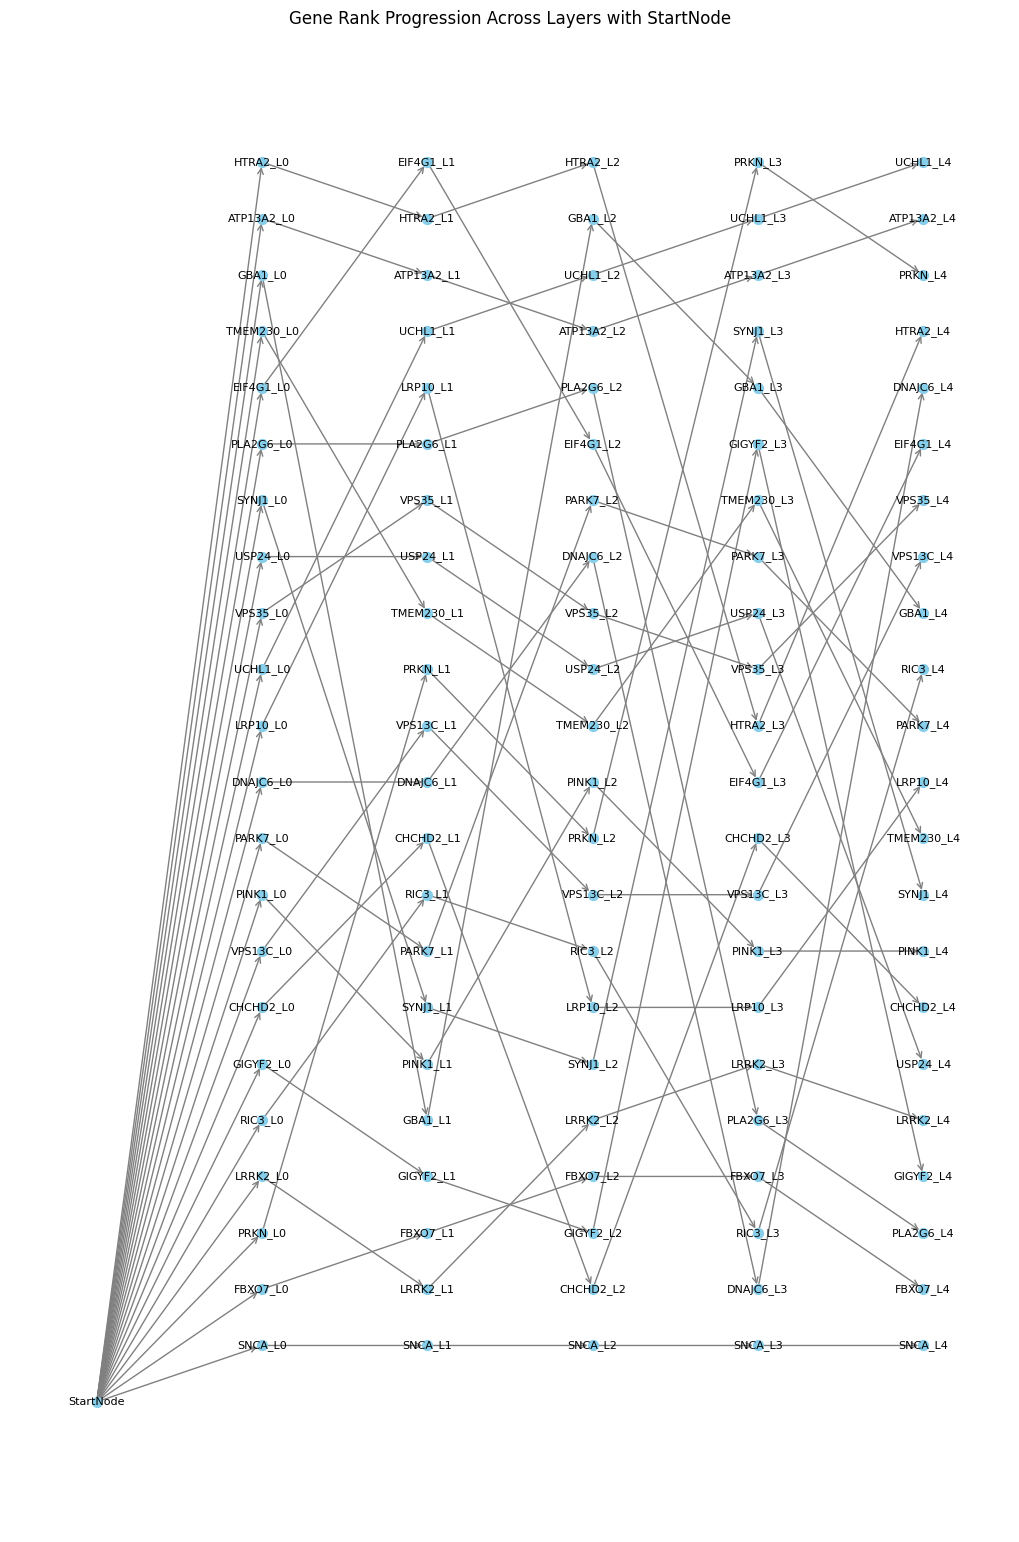

In [117]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)

# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.savefig("gene_rank_progression.svg", format="svg")
plt.savefig("smaller_plots/smaller_gene_ranked_prgression_control_to_pd.png", dpi=100)

plt.show()


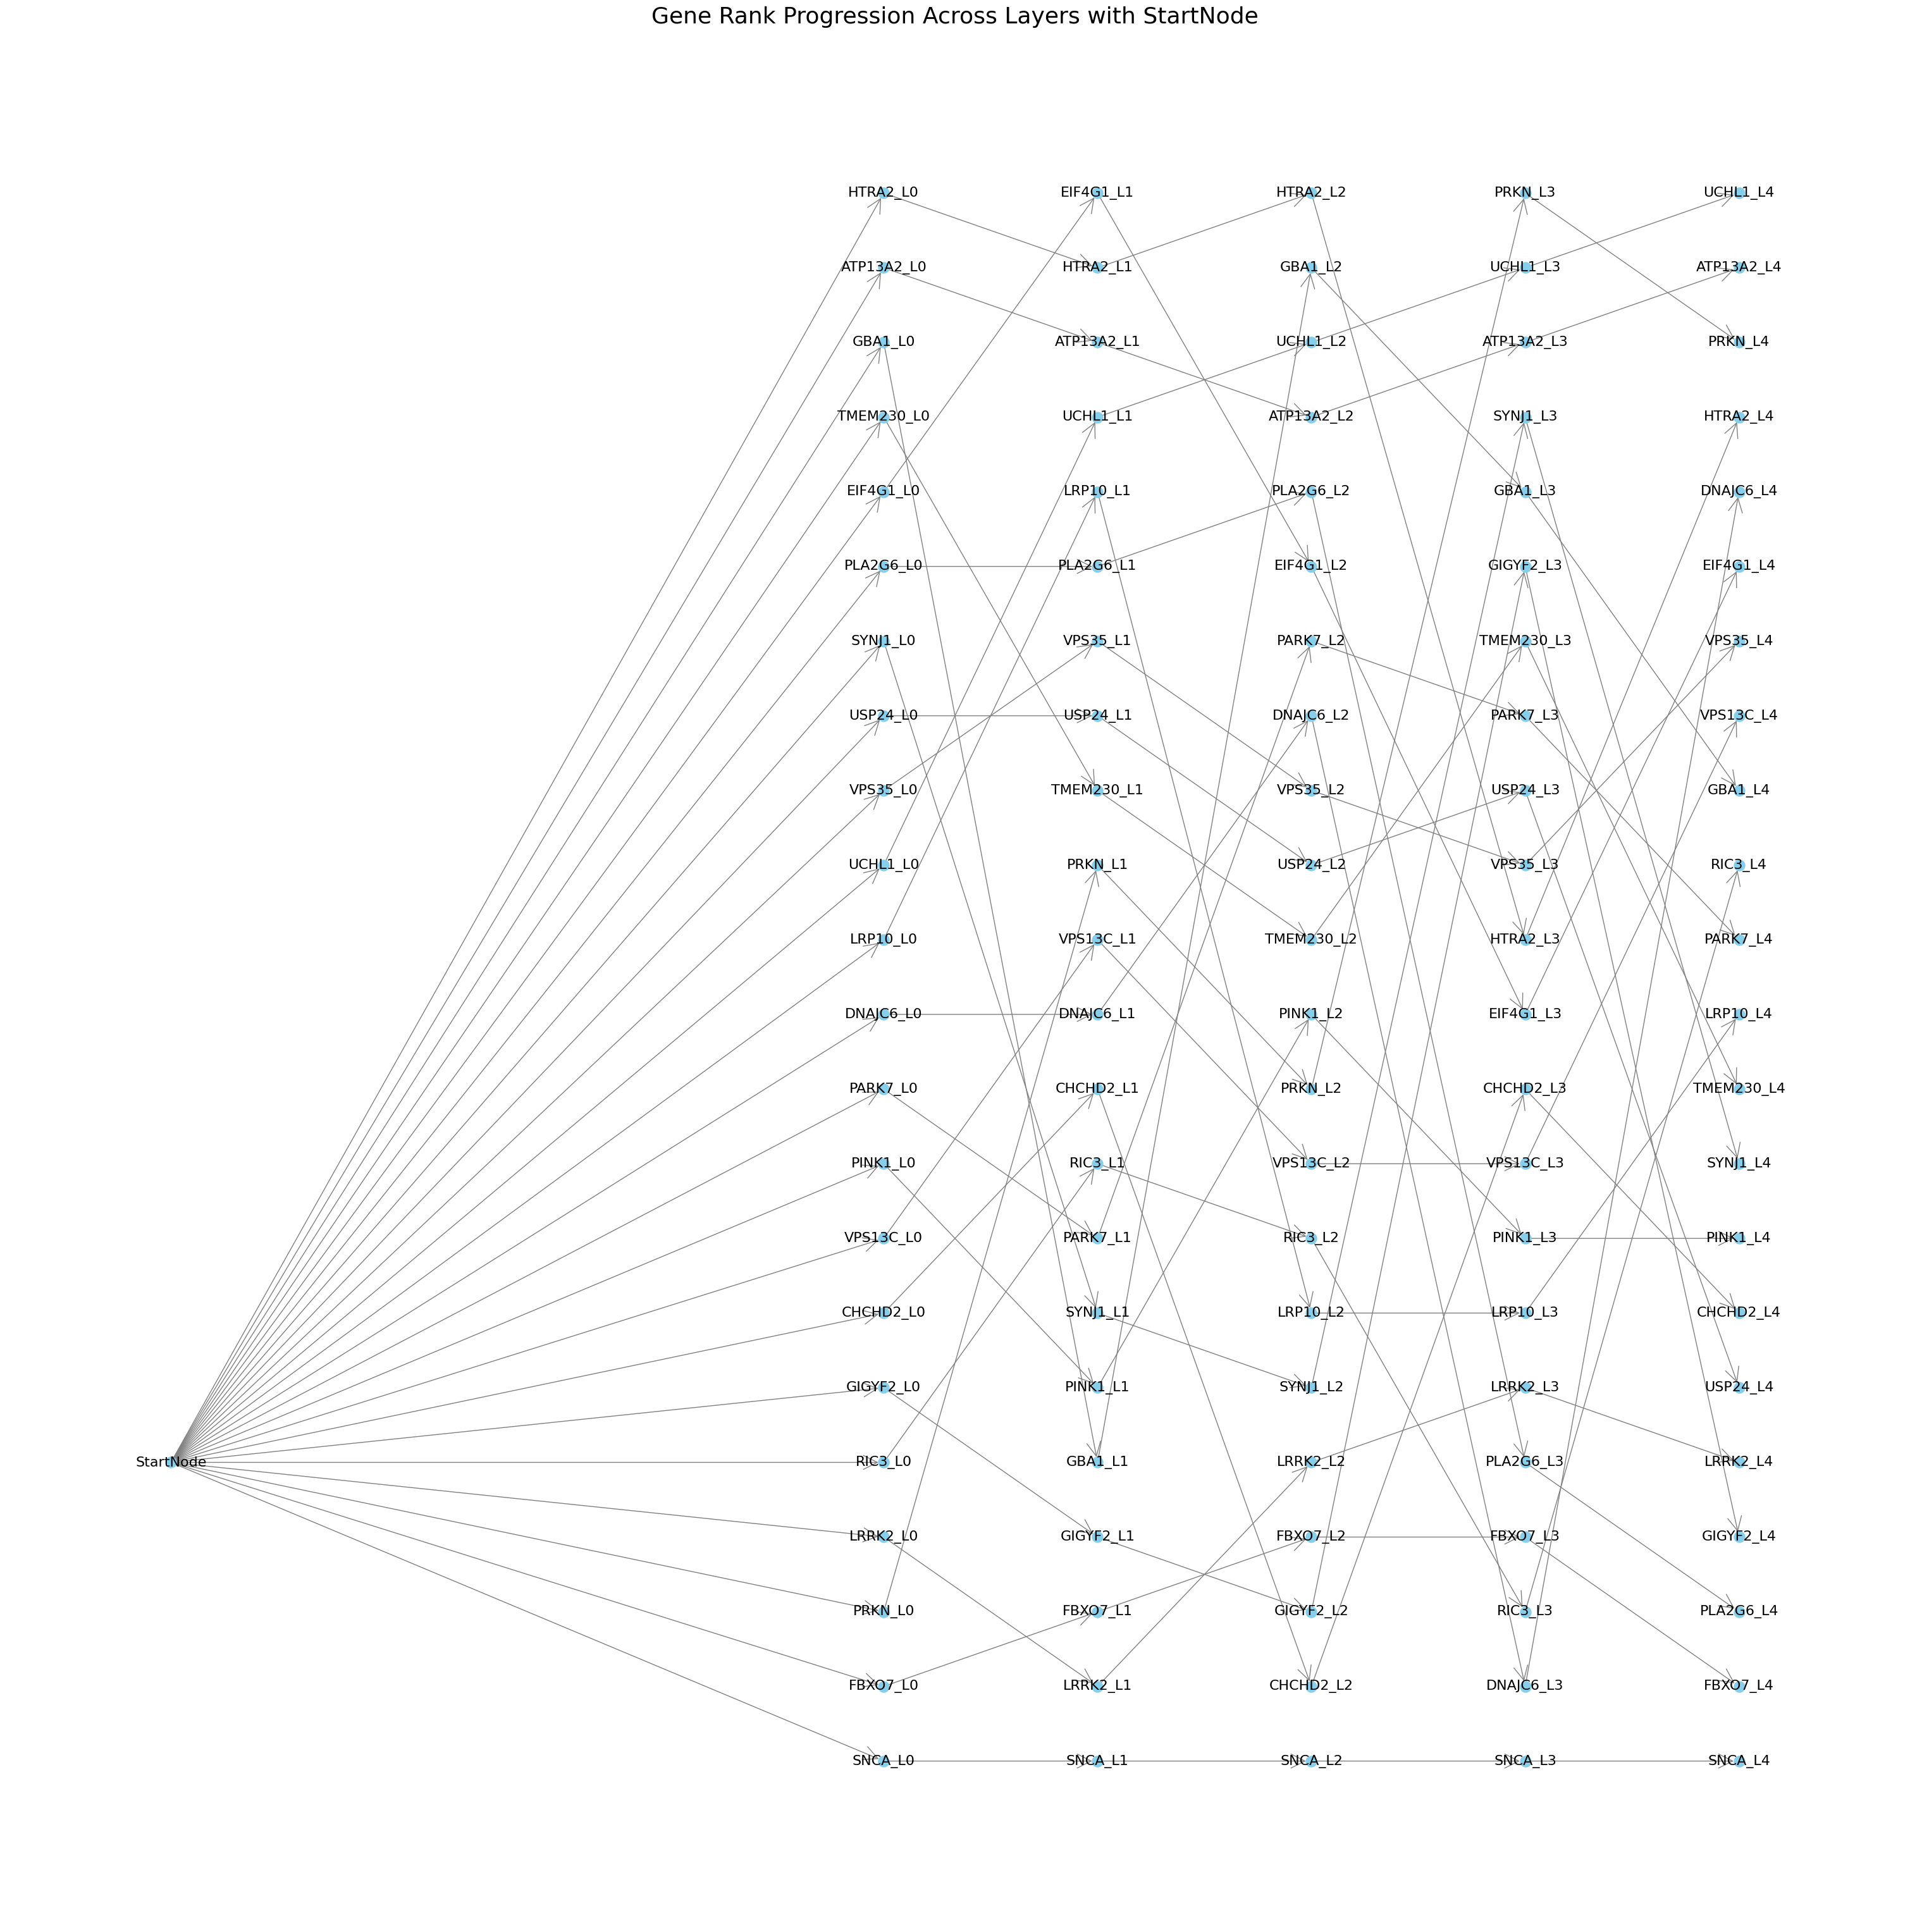

In [118]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)



# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

# Set the position of the StartNode to be at the mid-left of the first layer
start_node_x_pos = -5 # Fixed position on the left
start_node_y_pos = -1.5  # Middle of first layer vertically

# Position the nodes
for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    
    if layer == -1:
        # Place the StartNode on the mid-left of the first layer
        pos[node] = (start_node_x_pos, start_node_y_pos)
    else:
        # Place other nodes based on their layer and rank
        pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(30, 30))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=16, arrowstyle='->', arrowsize=40, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode", fontsize=26)
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower

# Save the plot as an SVG file
plt.savefig("gene_rank_progression_with_start_node_left.svg", format="svg")
plt.savefig("gene_rank_progression_with_start_node_left.png", format="png")
# Show the plot
plt.show()


In [120]:
!mkdir -p feature_importance_weights/PD_genes/control_vs_pd

def return_value(i):

    l = [AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL[i],AVG_FEATURE_IMPORTANCES_PD_V02_Control_V02[i],AVG_FEATURE_IMPORTANCES_PD_V04_Control_V04[i],
    AVG_FEATURE_IMPORTANCES_PD_V06_Control_V06[i],AVG_FEATURE_IMPORTANCES_PD_V08_Control_V08[i]]
    return l


li = []
genes = []
for i in AVG_FEATURE_IMPORTANCES_PD_BL_Control_BL.keys():
    
    li.append(return_value(i))
    genes.append(i)

df = pd.DataFrame(li)
df['genes'] = genes
df = df.set_index('genes')
df.columns = ['BL','V02','V04','V06','V08']
df['Gene_Name'] =df.reset_index()['genes'].apply(return_gene_name).tolist()
df = df.set_index('Gene_Name')
df.to_csv(f'feature_importance_weights/PD_genes/control_vs_pd/control_vs_pd.csv',index = True)
df


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


BL       V02       V04       V06       V08
Gene_Name                                                  
TMEM230    0.116756 -0.051998  0.018409 -0.041273  0.031152
RIC3       0.006840  0.018690 -0.009107 -0.002222 -0.036630
CHCHD2     0.014346  0.021180 -0.002236  0.011021 -0.015017
SYNJ1      0.064846 -0.016732  0.008285 -0.080798  0.027108
PARK7     -0.028976  0.018123  0.034237  0.035429 -0.035211
VPS35     -0.036387 -0.091418  0.028812 -0.025749  0.055752
DNAJC6     0.029398 -0.034412 -0.029760 -0.001565  0.103838
UCHL1      0.032833 -0.218598  0.168533 -0.125166  0.561095
ATP13A2   -0.139162 -0.255259 -0.159026 -0.125128 -0.486284
PRKN      -0.003000  0.047990 -0.011978 -0.150364 -0.182712
GIGYF2     0.012867  0.004885  0.003579  0.043982  0.006441
VPS13C     0.016648  0.038685  0.009607  0.009840  0.043972
LRP10     -0.029926 -0.117249  0.008348 -0.007143  0.031912
PINK1     -0.021536  0.006963 -0.012061 -0.009784 -0.019560
HTRA2     -0.250098 -0.273804 -0.193571  0.024478 -0.106500
EIF4G1     0.114739  0.293643  0.051601  0.021271  0.098148
USP24     -0.047271 -0.064813 -0.022829 -0.033046 -0.009222
LRRK2     -0.006457  0.000727 -0.007648 -0.005406 -0.007229
FBXO7      0.001615  0.002505  0.003717  0.003854  0.001291
PLA2G6    -0.090219 -0.099652 -0.059978 -0.004161 -0.001478
SNCA       0.000005 -0.000271  0.000194 -0.000048  0.000257
NaN        0.119334  0.005011  0.178042  0.069201 -0.041541